#### Modern Wage Dyanmics v1.3
Sensitivity Analysis

In [1]:
library(data.table)
suppressPackageStartupMessages(library(tidyverse))
library(ggthemes)
library(patchwork)
library(repr)
options(warn = - 1)   

palette12 <- c('steelblue3', 'deepskyblue2', 'royalblue3',  'cadetblue',  
             'paleturquoise3', 'darkslategrey', 'palegreen3', 'navajowhite3', 
             'darkorange', 'lightpink2', 'red3', 'darkred')
palette_ordered <- c('darkred', 'deepskyblue2', 'cadetblue', 'red3', 
                    'steelblue3', 'lightpink2', 'darkslategrey', 'paleturquoise3', 
                    'royalblue3', 'darkorange', 'palegreen3', 'navajowhite3')

In [2]:
macro <- c('set', 'run', 'n', 'S_N', 'H_max', 'A', 'gamma', 'mu', 'step', 'omega_0', 'H_S', 'H_D', 'S_S', 'S_D', 'H_M', 'S_M', 'p', 
           'omega', 'total_pi', 'total_m', 'total_H_O', 'total_H_N')

### S_N sensitivity

In [6]:
#directory <- './results'
directory <- '~/Dropbox\ (ASU)/MWDv2.0'
series_name <- 'series_Mar1_SN100to3200_r500_n100_w10_p1_A3_gamma1p2'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
results <- raw %>% select(all_of(macro))
plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max))

As $S_N$ increases, more and more runs stop at $S_M = nS_N$, starting at $S_N = 1000$.  
For $S_N = 3200$, only 83 runs have $S_M > nS_N$, so mean values will have higher variance.

In [ ]:
results %>% group_by(S_N, run) %>% filter(abs(S_D - S_S) >= 1) %>% 
    filter(step == max(step)) %>% select(run, step, n, S_N, S_M, omega, p) %>% mutate(S_N_total = n * S_N) %>% 
    group_by(S_N) %>% filter(round(S_M) == S_N_total) %>% mutate(count = n()) %>% distinct(count)

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 16)

a <- plot_macro %>% filter(measure %in% c('S_M')) %>%
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ S_N) + geom_line(aes(y = S_N * n), linetype = 'dotted', colour = 'gray')

a

In [7]:
summary <- results %>% group_by(S_N, run) %>% filter(step == max(step)) %>%
filter(round(S_M) != n * S_N) %>% mutate(U = (n * H_max - H_M) ** .5 * ((S_M - n * S_N) ** .5)) %>% 
    group_by(S_N) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = n()) %>% distinct
summary

`summarise()` has grouped output by 'S_N'. You can override using the `.groups`
argument.


S_N,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
100,148303.4,1483.034,8128.687,20228.82,14.72474,0.8135972,18.09930,1633.4820,65607.89,500
200,173670.4,1736.704,9290.739,20478.66,14.34271,0.7702070,18.62271,1085.5240,68247.17,500
500,215992.4,2159.924,11156.967,21399.94,13.80554,0.7138714,19.33984,689.1700,69026.61,500
800,244753.5,2447.535,12385.479,22001.85,13.52299,0.6845755,19.75280,575.9860,67359.74,500
1000,261555.4,2615.554,13090.622,22429.46,12.95390,0.6485683,19.97345,539.4262,65850.22,413
1200,277242.6,2772.426,13742.099,22753.57,12.86827,0.6380435,20.16888,503.8659,64175.32,276
1600,310182.8,3101.828,15090.978,23918.15,11.97829,0.5828454,20.55138,508.0720,61113.09,250
2000,335653.4,3356.534,16117.184,24593.57,11.63990,0.5589790,20.82399,785.5658,56877.69,76
2400,362768.9,3627.689,17195.337,25640.69,11.20939,0.5313620,21.09564,807.2474,52874.47,97


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


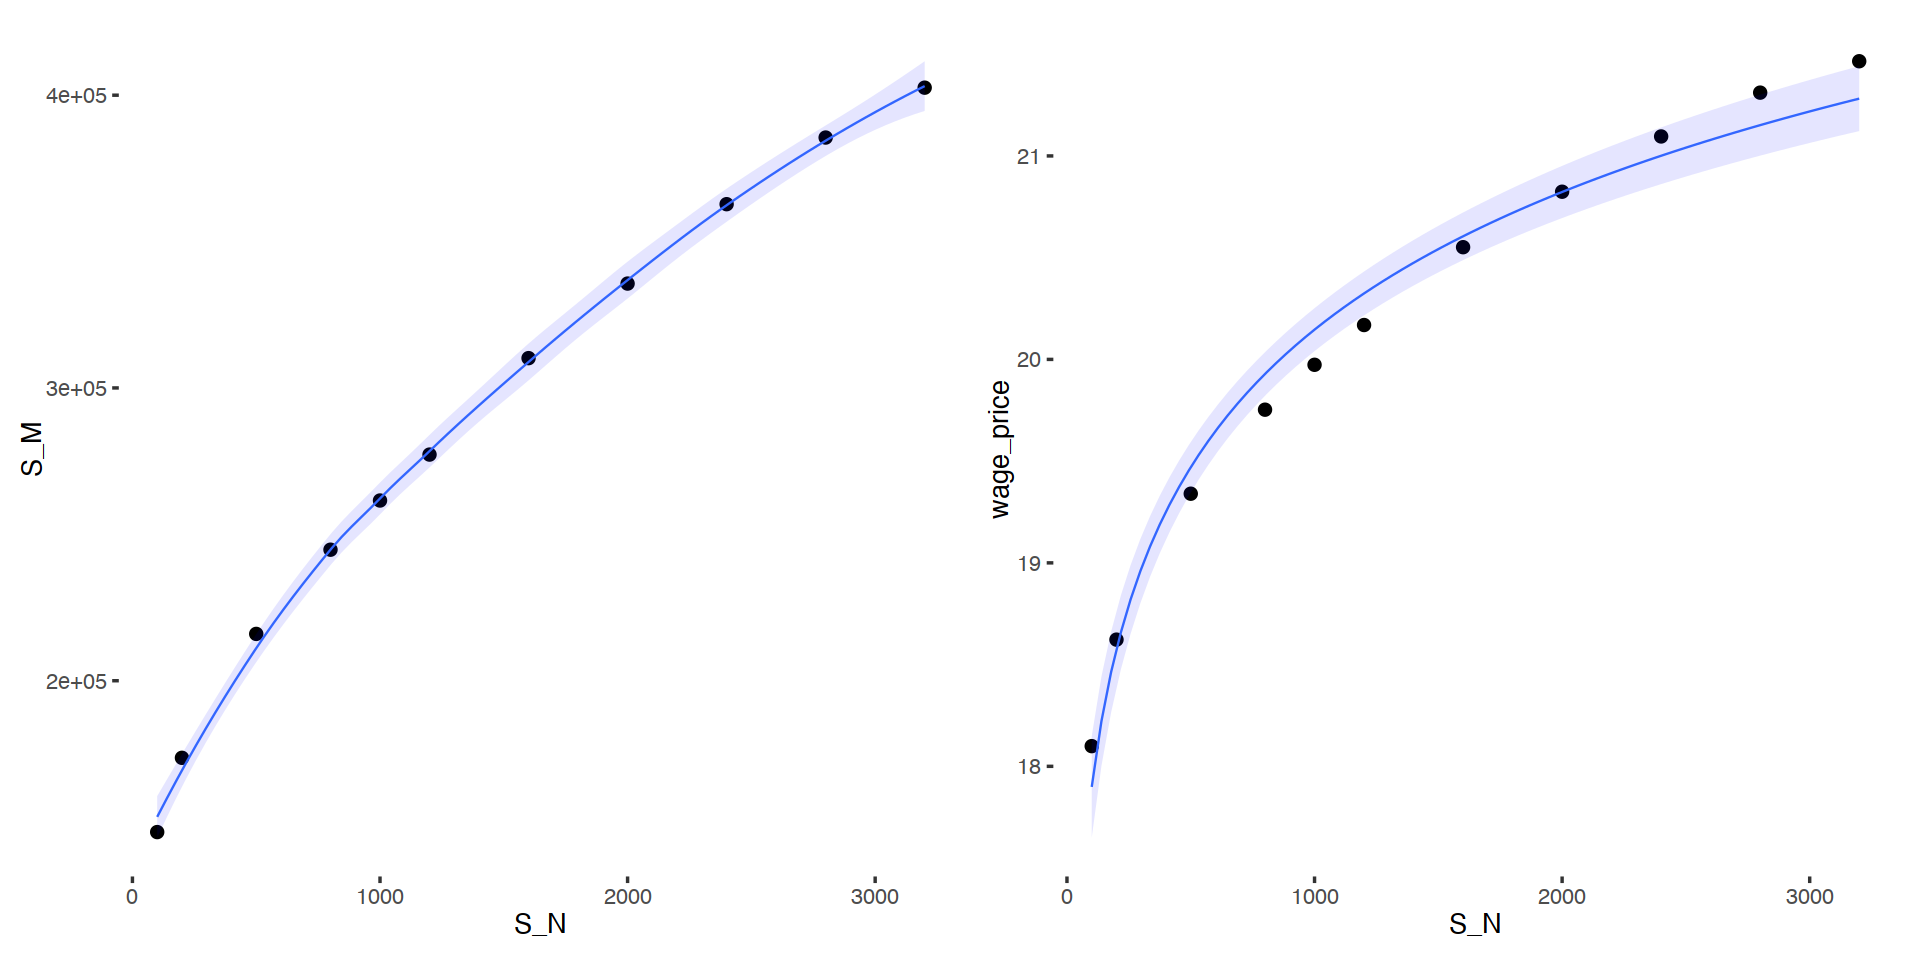

In [13]:
options(repr.plot.width = 16, repr.plot.height = 8)
a <- summary %>% ggplot(aes(x = S_N, y = S_M)) + theme_tufte(base_size = 16) +
    geom_point(size = 3) + geom_smooth(size = .5, fill = 'blue', alpha = .1)
b <- summary %>% ggplot(aes(x = S_N, y = wage_price)) + theme_tufte(base_size = 16) + geom_point(size = 3) +
    geom_point(size = 2) + geom_smooth(size = .5, fill = 'blue', alpha = .1, method = 'lm', formula = (y ~ log(x)))
    #+ geom_smooth(size = .5, fill = 'blue', alpha = .1)
a + b

In [14]:
ggsave('./plots/SN_sensitivity.pdf', height = 8, width = 16)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


### n sensitivity

In [4]:
directory <- '~/Dropbox\ (ASU)/MWDv2.0'
# series_name <- '/series_Mar4_SN300_r500_mu1_n5000_w10_p1'
# raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
# results <- raw %>% filter(step > 0) %>% select(all_of(macro))
# plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max))

In [15]:
#directory <- './results'
series_name <- 'series_Mar4_SN300_r500_mu1_n200to800_w10_p1'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n1000_w10_p1'
raw2 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n2500_w10_p1'
raw3 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- '/series_Mar4_SN300_r500_mu1_n5000_w10_p1'
raw4 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n7500_w10_p1'
raw5 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n10000_w10_p1'
raw6 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n15000_w10_p1'
raw7 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Mar4_SN300_r500_mu1_n20000_w10_p1'
raw8 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)

results <- rbind(raw, raw2, raw3, raw4, raw5, raw6, raw7, raw8) %>% filter(step > 0) %>% select(all_of(macro))

#plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max))

In [17]:
results <- raw6 %>% filter(step > 0) %>% select(all_of(macro))
plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max))

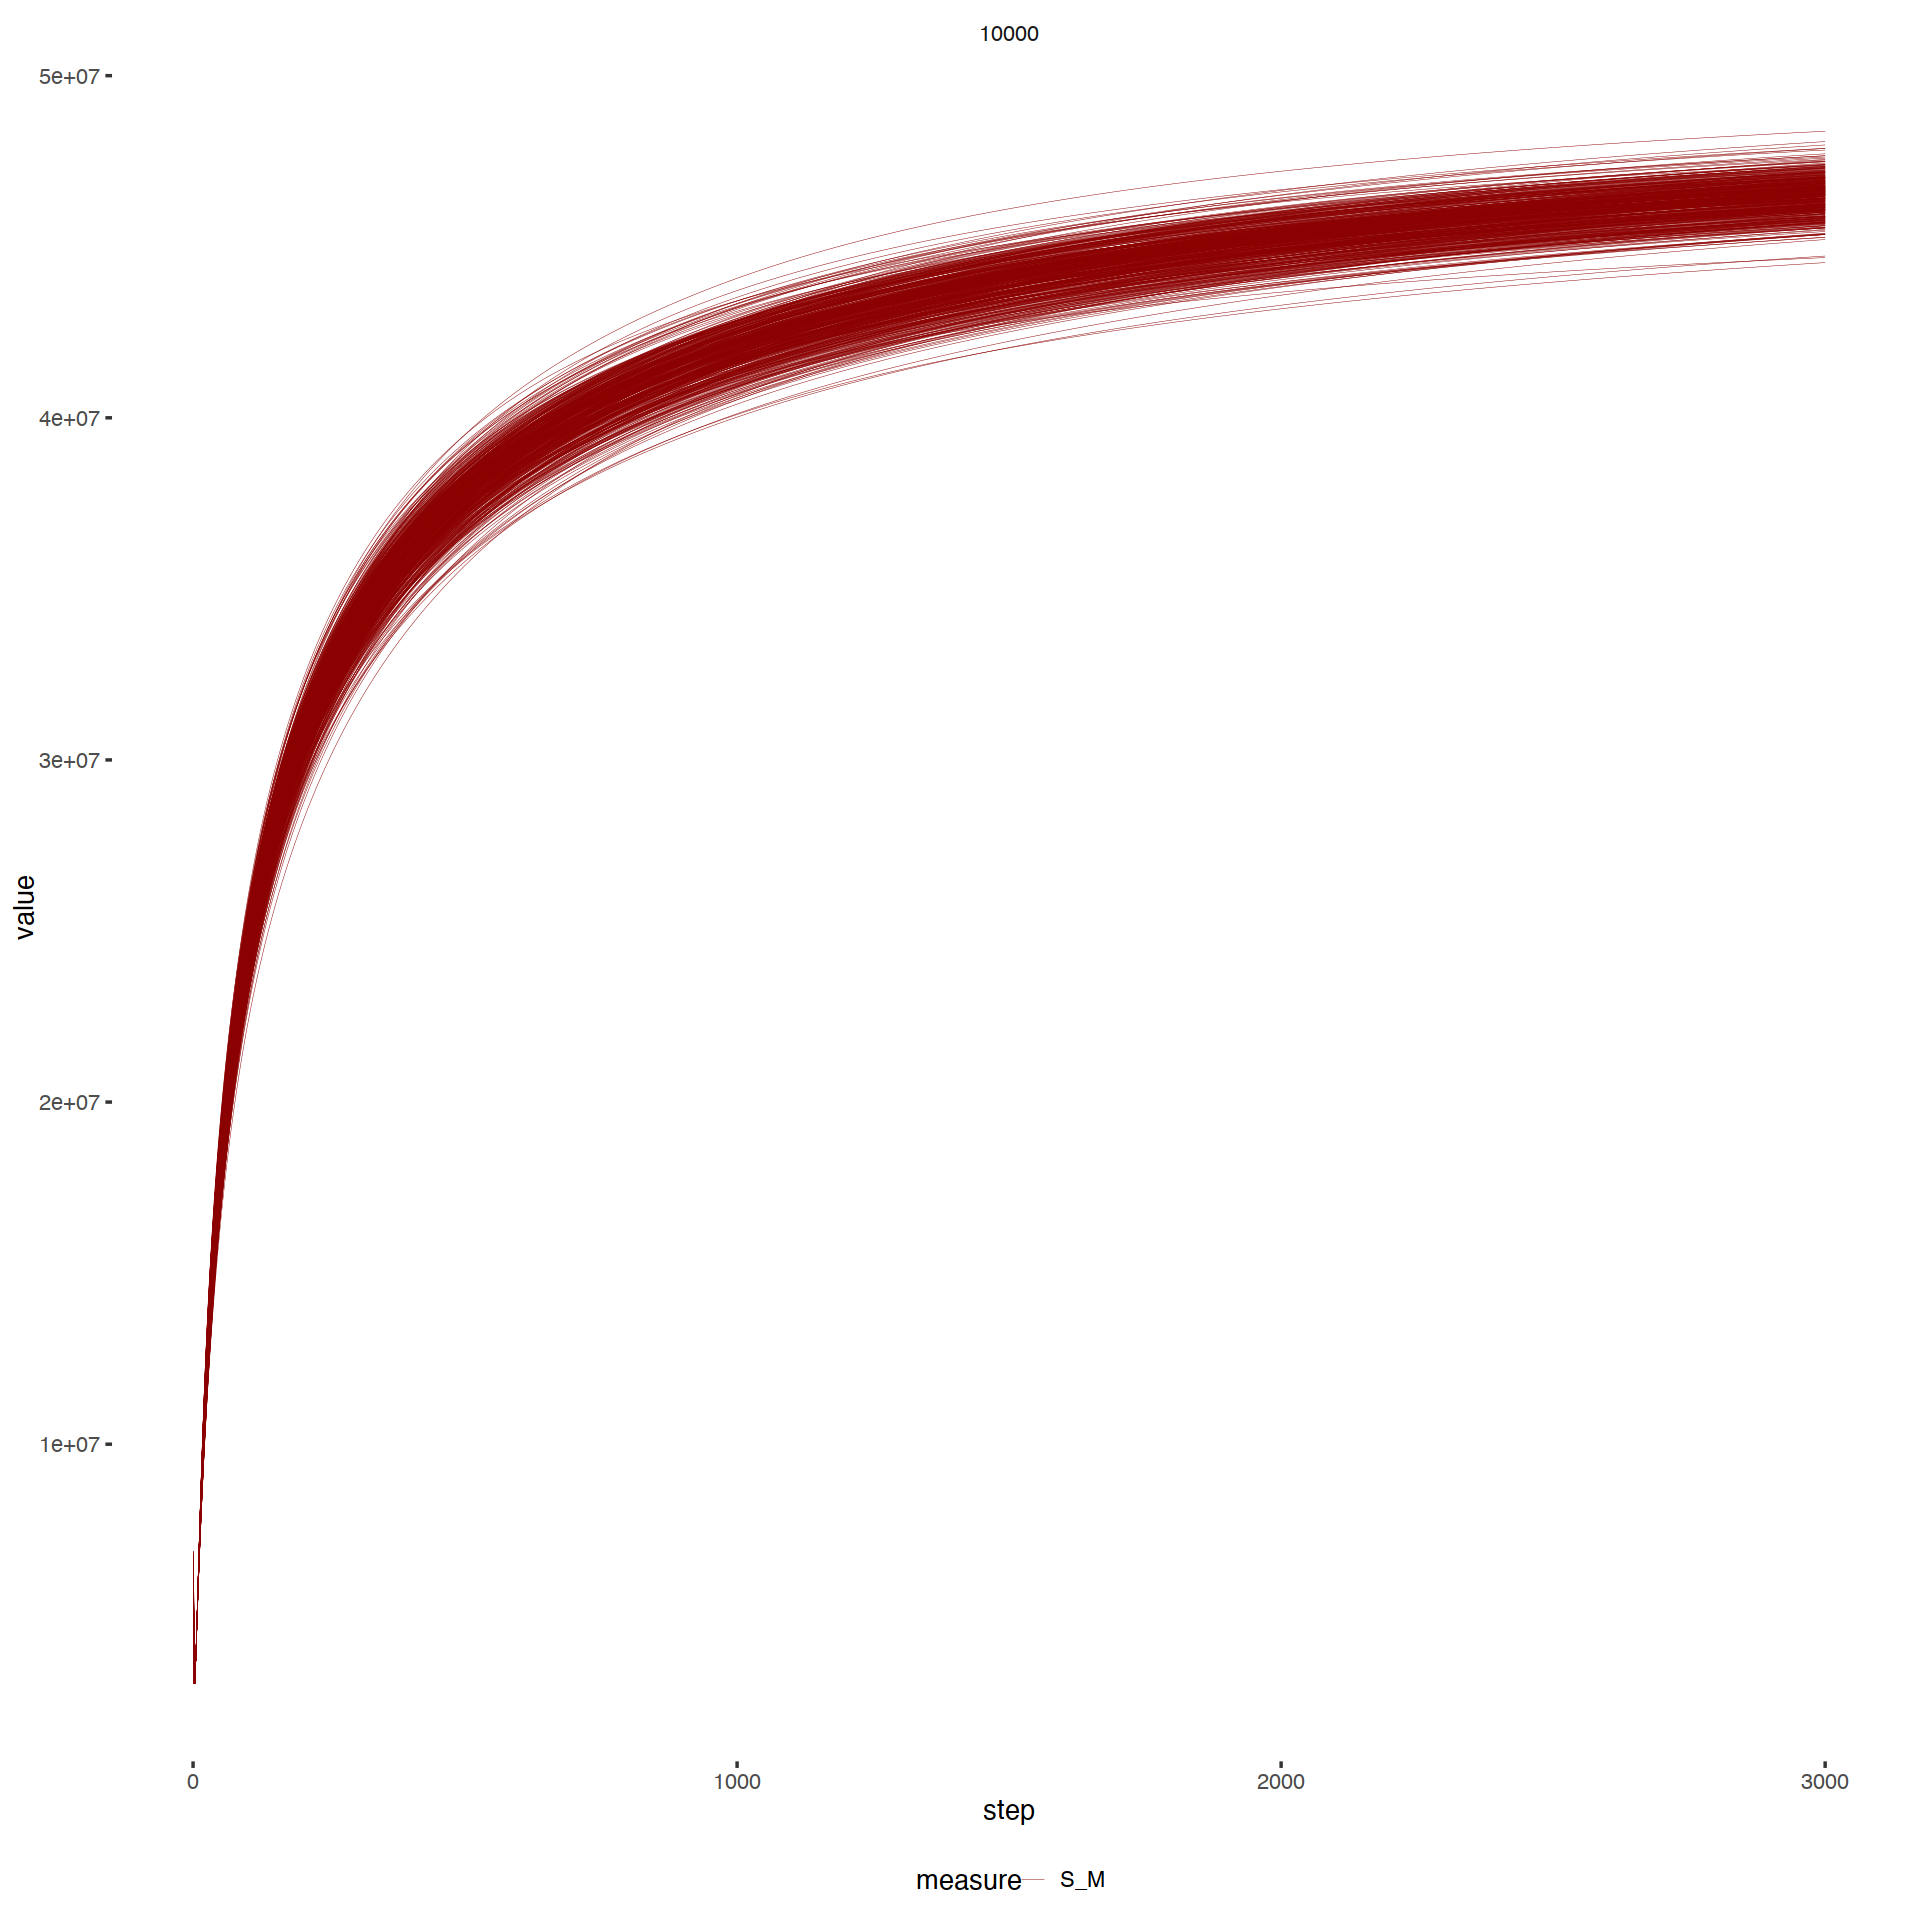

In [18]:
options(repr.plot.width = 16, repr.plot.height = 16)

a <- plot_macro %>% filter(measure %in% c('S_M')) %>% 
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ n)

a

In [16]:
summary <- results %>% mutate(U = (n * H_max - H_M) ** .5 * (S_M - n * S_N) ** .5) %>% group_by(n, run) %>% 
    filter(abs(S_D - S_S) >= 1) %>% filter(step == max(step))  %>%
    group_by(n) %>% mutate(converged = sum(step != 3000)) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = mean(converged)) %>% distinct
summary

`summarise()` has grouped output by 'n'. You can override using the `.groups`
argument.


n,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
200,451110.7,2255.554,20611.78,41338.02,14.81371,0.6774062,21.86714,1955.016,152158.8,500
400,1054268.2,2635.671,41826.93,82380.90,16.22134,0.6438028,25.19746,2985.012,332080.2,28
600,1705860.8,2843.101,62465.69,123340.34,17.56455,0.6432888,27.30325,3000.000,520285.3,0
800,2401423.4,3001.779,83065.78,164304.81,17.58444,0.6083187,28.90535,3000.000,715422.8,0
1000,3125268.0,3125.268,103462.37,204986.80,17.33324,0.5738672,30.20366,3000.000,915145.8,0
2500,9178241.4,3671.297,253913.83,510805.92,16.35403,0.4524560,36.14504,3000.000,2507389.0,0
5000,20666719.3,4133.344,499403.51,1018520.08,17.81522,0.4305143,41.38148,3000.000,5362690.7,0
7500,33224631.1,4429.951,741783.82,1524506.44,21.13943,0.4719626,44.78913,3000.000,8363138.4,0
10000,46505905.9,4650.591,981713.75,2031041.86,23.60729,0.4983373,47.37126,3000.000,11458844.8,0


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


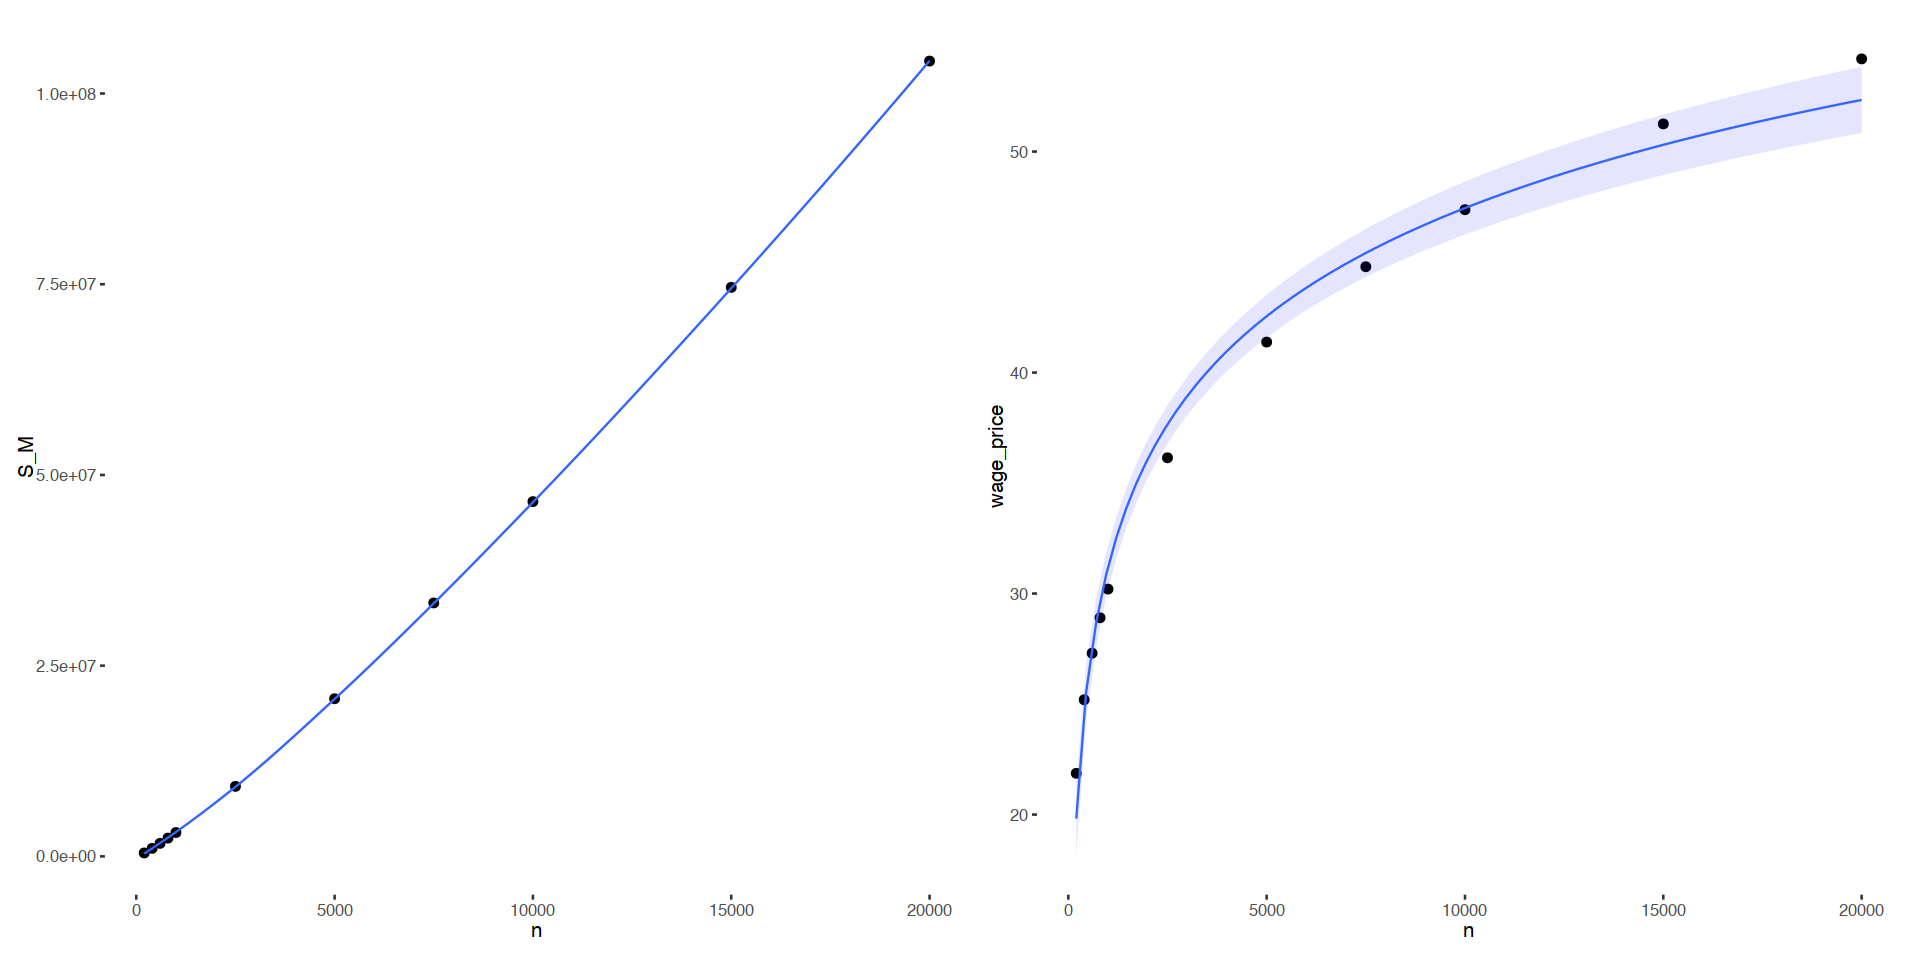

In [18]:
options(repr.plot.width = 16, repr.plot.height = 8)

a <- summary %>% ggplot(aes(x = n, y = S_M)) + theme_tufte(base_size = 12) +
    geom_point(size = 2) + geom_smooth(size = .5, fill = 'blue', alpha = .1)

b <- summary %>% ggplot(aes(x = n, y = wage_price)) + theme_tufte(base_size = 12) +
    geom_point(size = 2) + geom_smooth(size = .5, fill = 'blue', alpha = .1, method = 'lm', formula = (y ~ log(x)))
    #geom_point(size = 2) + geom_smooth(size = .5, fill = 'blue', alpha = .1, method = 'loess', span = 15)

a + b

In [20]:
ggsave('./plots/n_sensitivity.pdf', height = 8, width = 16)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


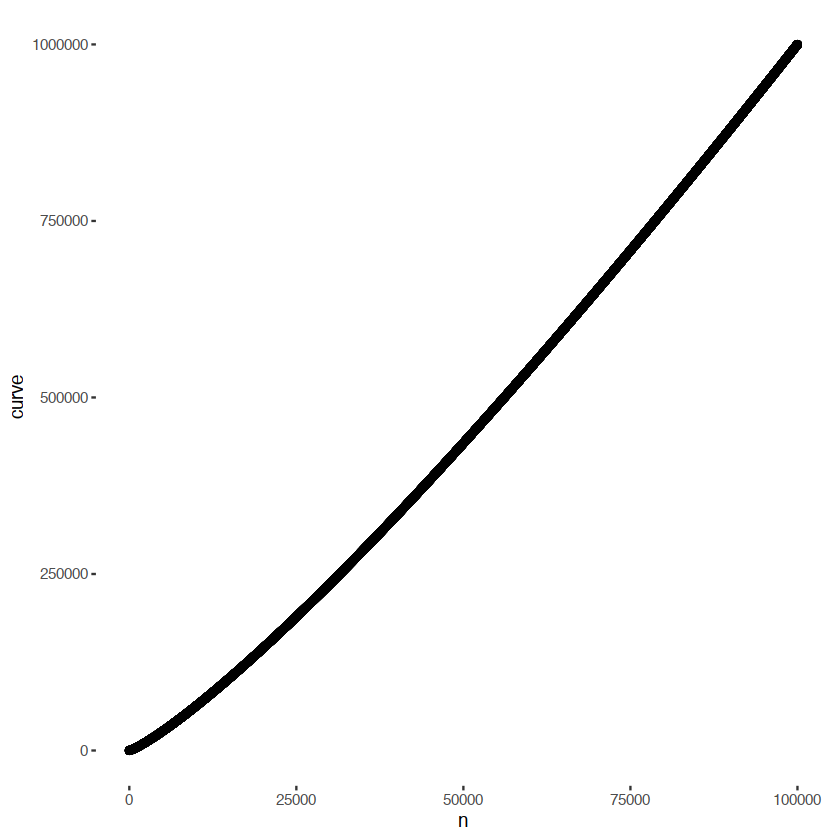

In [3]:
ns <- seq(1, 100000)
gamma <- 1.2
tibble(n = ns) %>% mutate(curve = n ^ gamma) %>% ggplot(aes(x = n, y = curve)) + theme_tufte() + geom_point()

### $\omega_0$ sensitivity

In [4]:
directory <- './results'
series_name <- 'series_Feb3_t1000_SN300_r500_mu5_n100_w1to50_p1_pctp1_v3'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Feb3_t1000_SN300_r1000_mu5_n100_w10_p1_pctp1_v3' 
raw2 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE) %>% filter(run < 500)

results <- rbind(raw, raw2) %>% filter(step > 0) %>% select(all_of(macro))
plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max, omega_0)) %>% filter(step > 1)

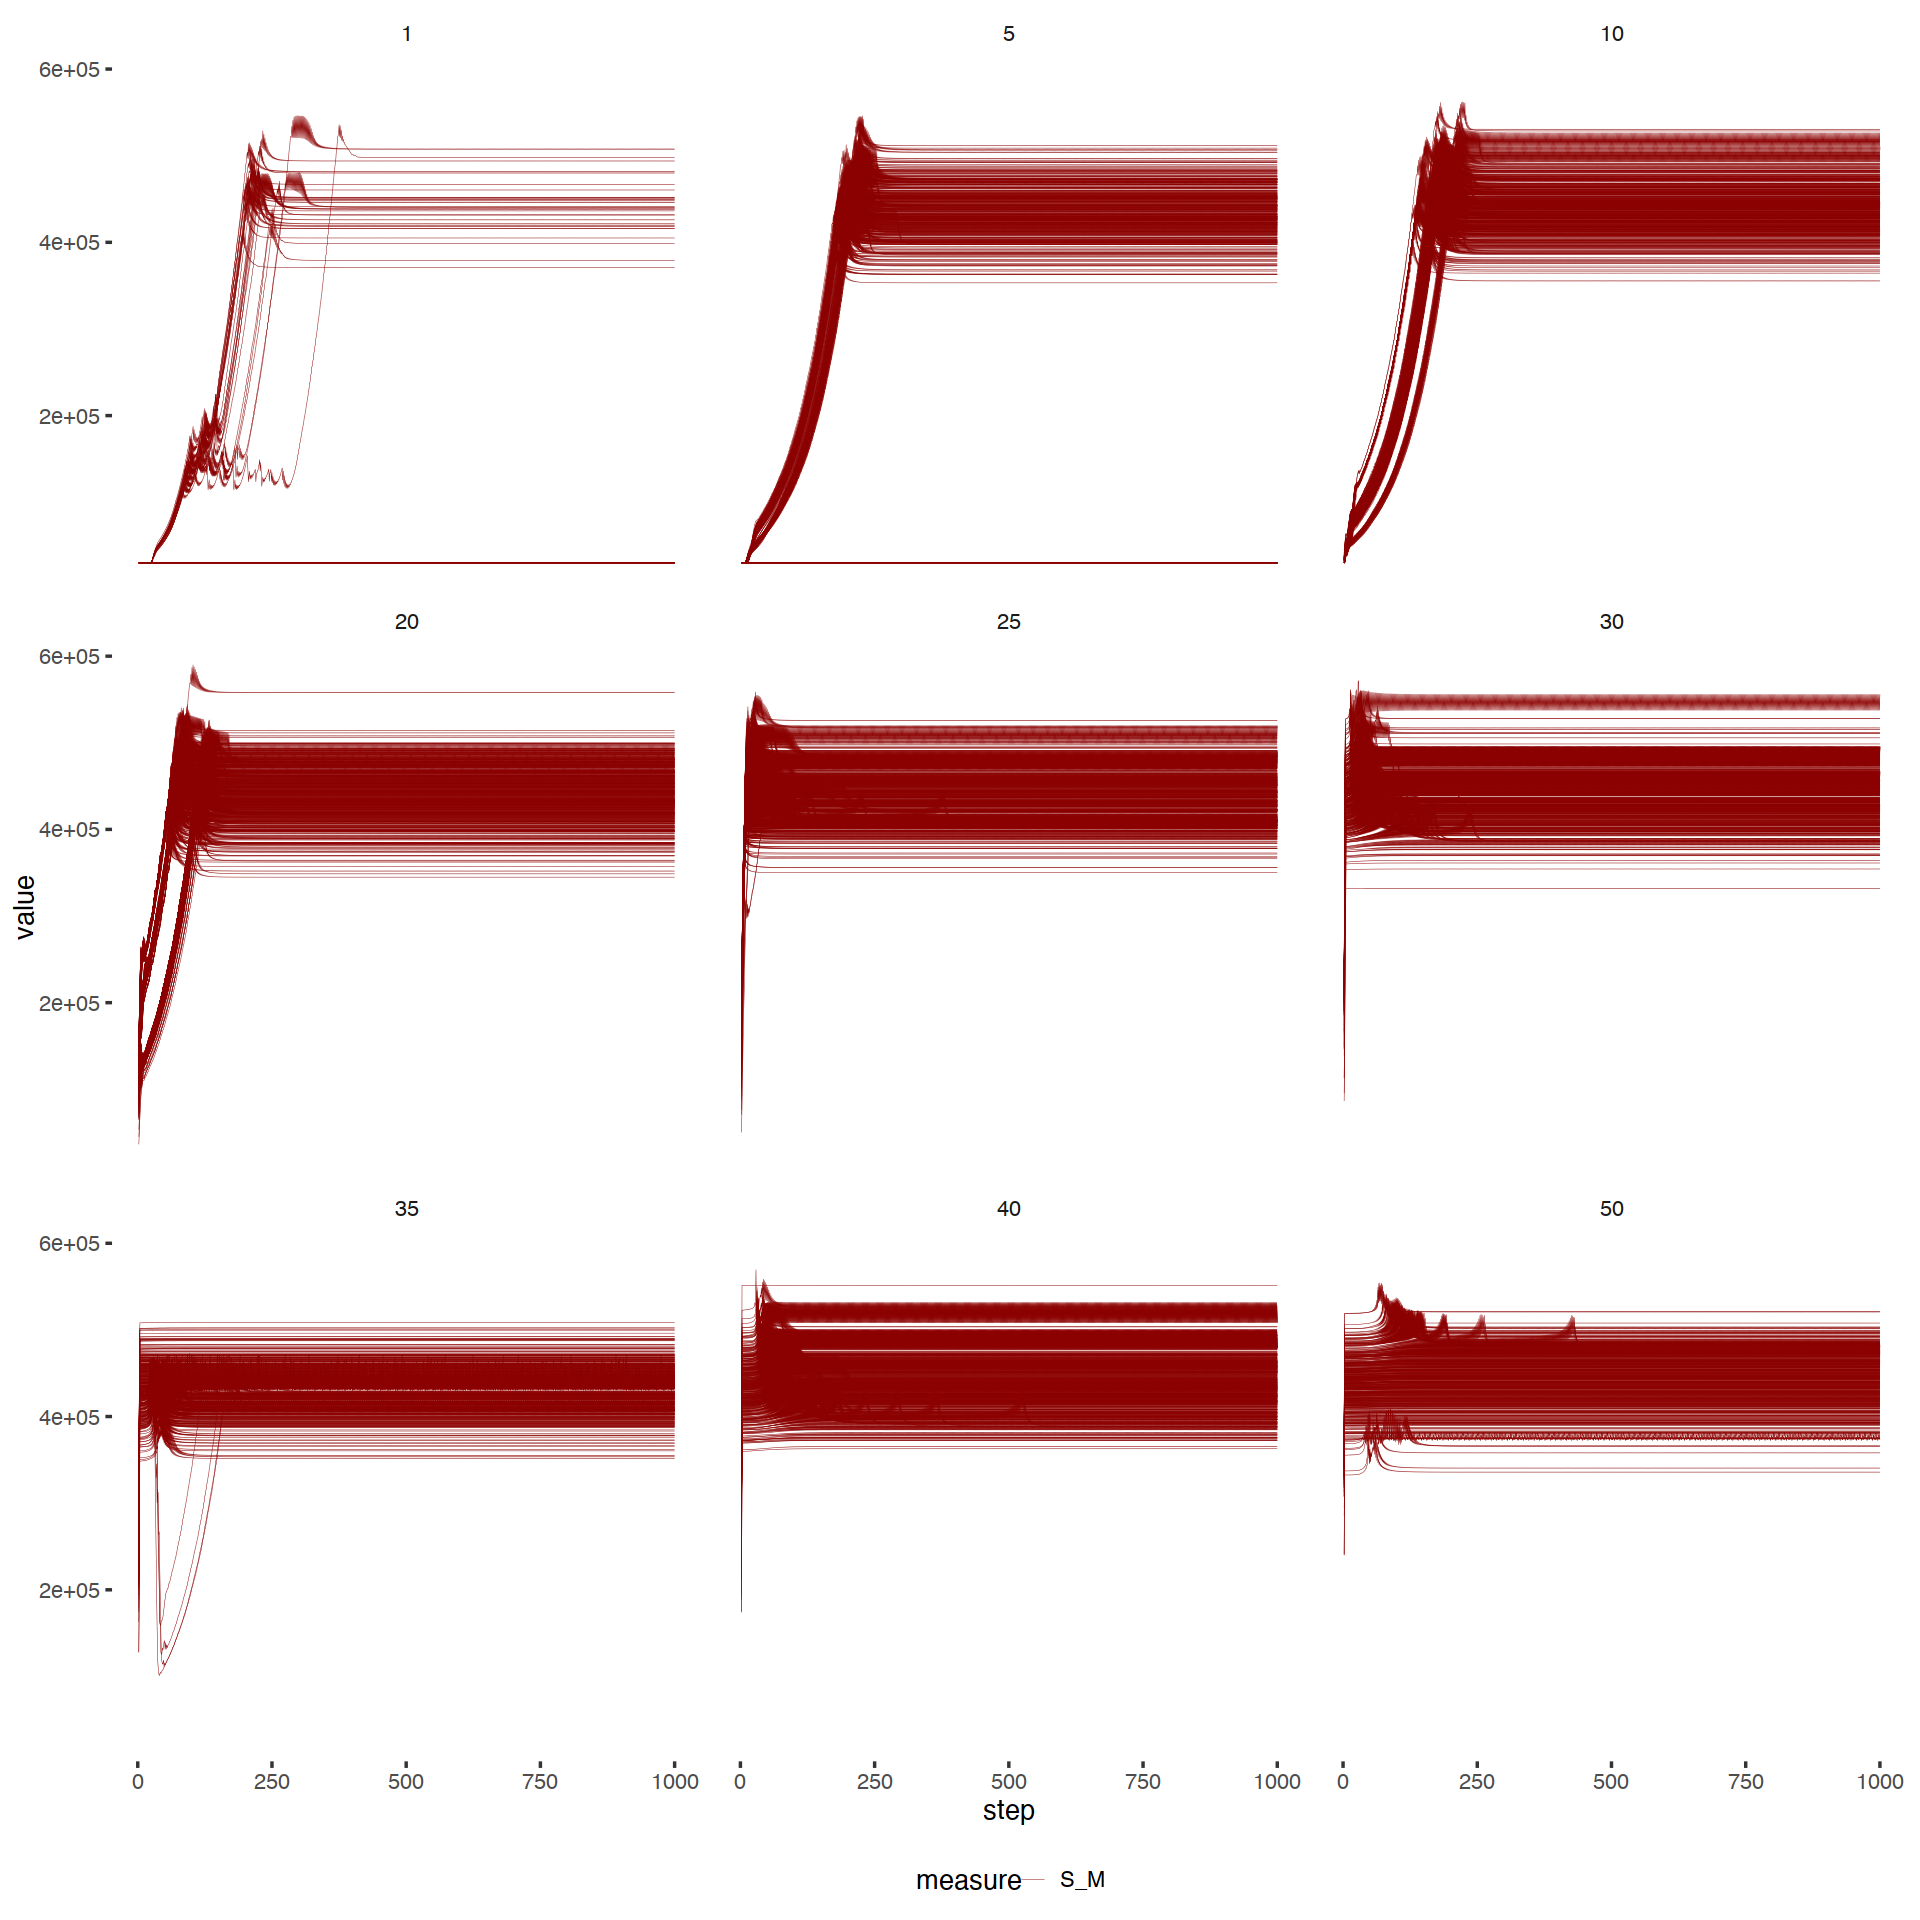

In [5]:
a <- plot_macro %>% filter(measure %in% c('S_M')) %>% 
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ omega_0)

options(repr.plot.width = 16, repr.plot.height = 16)
a

4 different outcomes

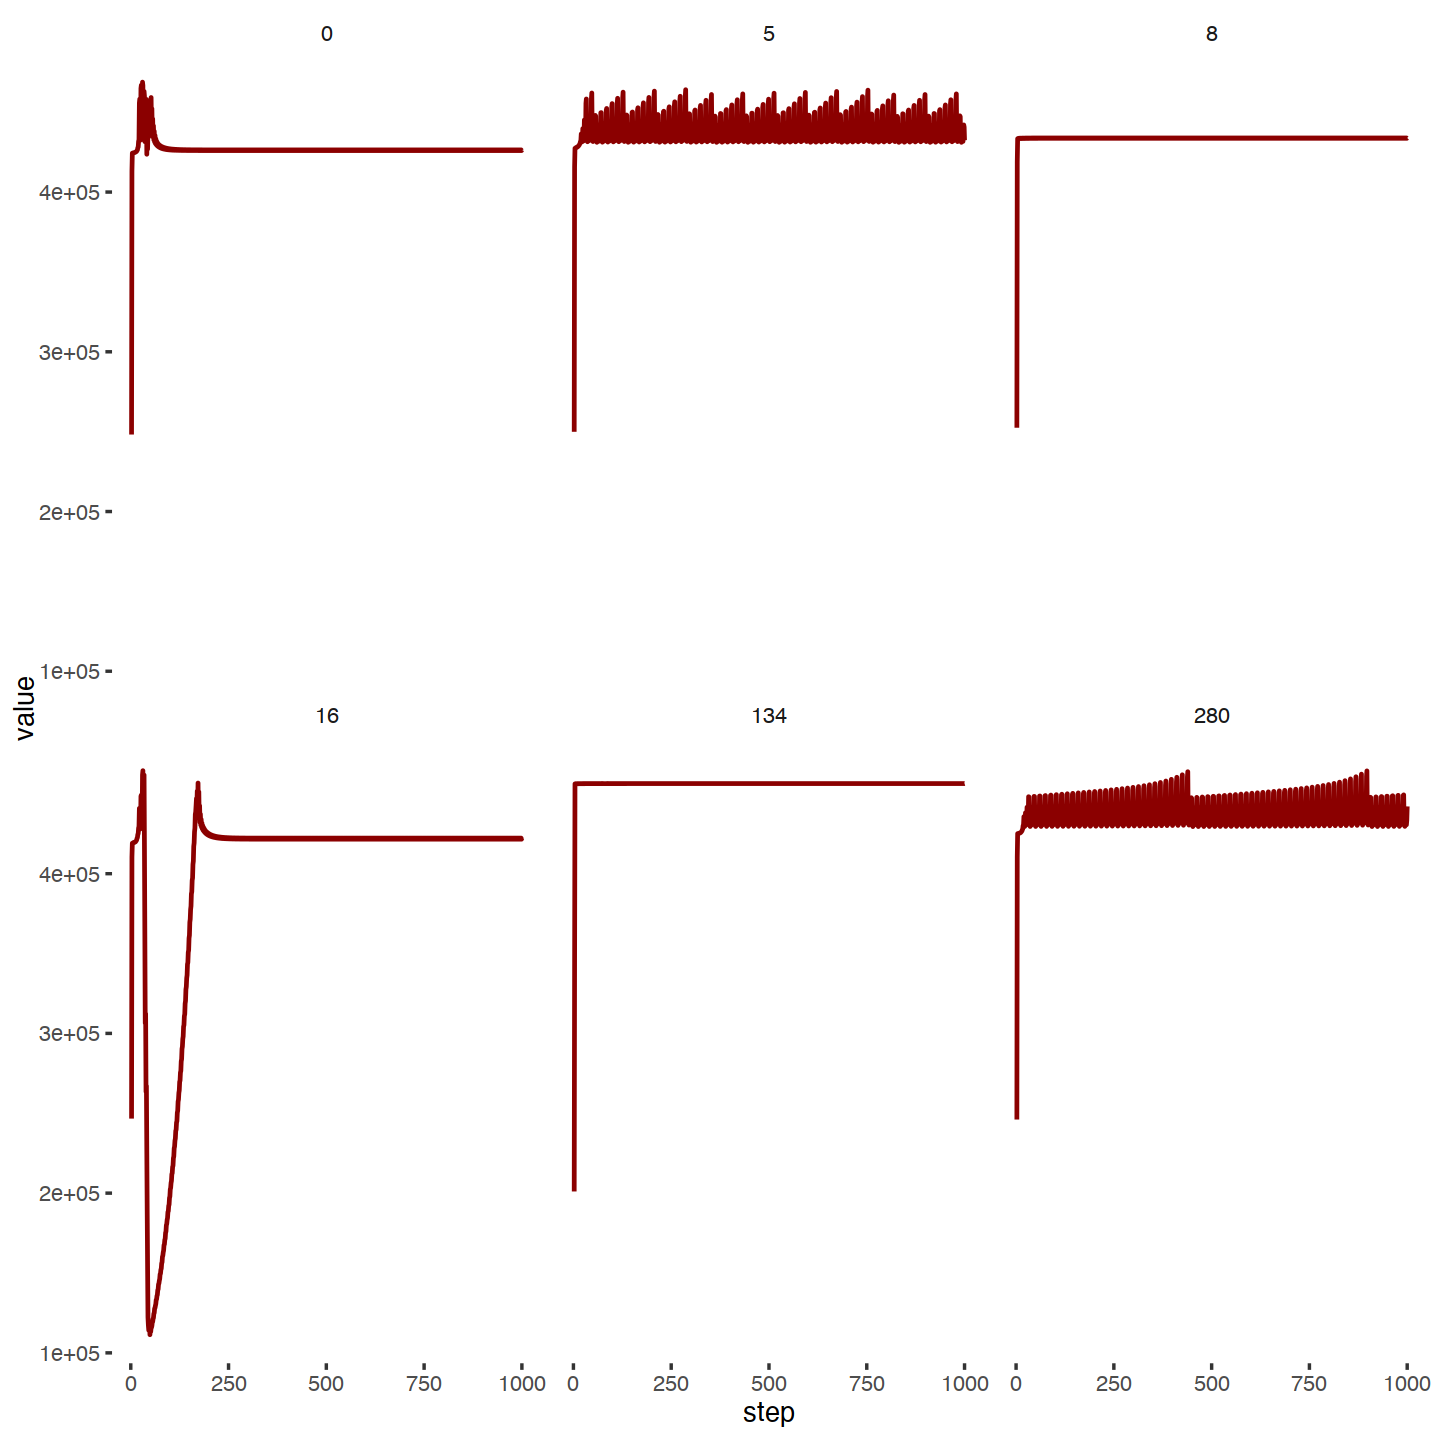

In [6]:
options(repr.plot.width = 12, repr.plot.height = 12)
plot_macro %>% filter(measure %in% c('S_M')) %>% filter(omega_0 == 35, run %in% c(0, 5, 8, 16, 134, 280), step > 1) %>%
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = 1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'none') +
    facet_wrap(~ run, ncol = 3)

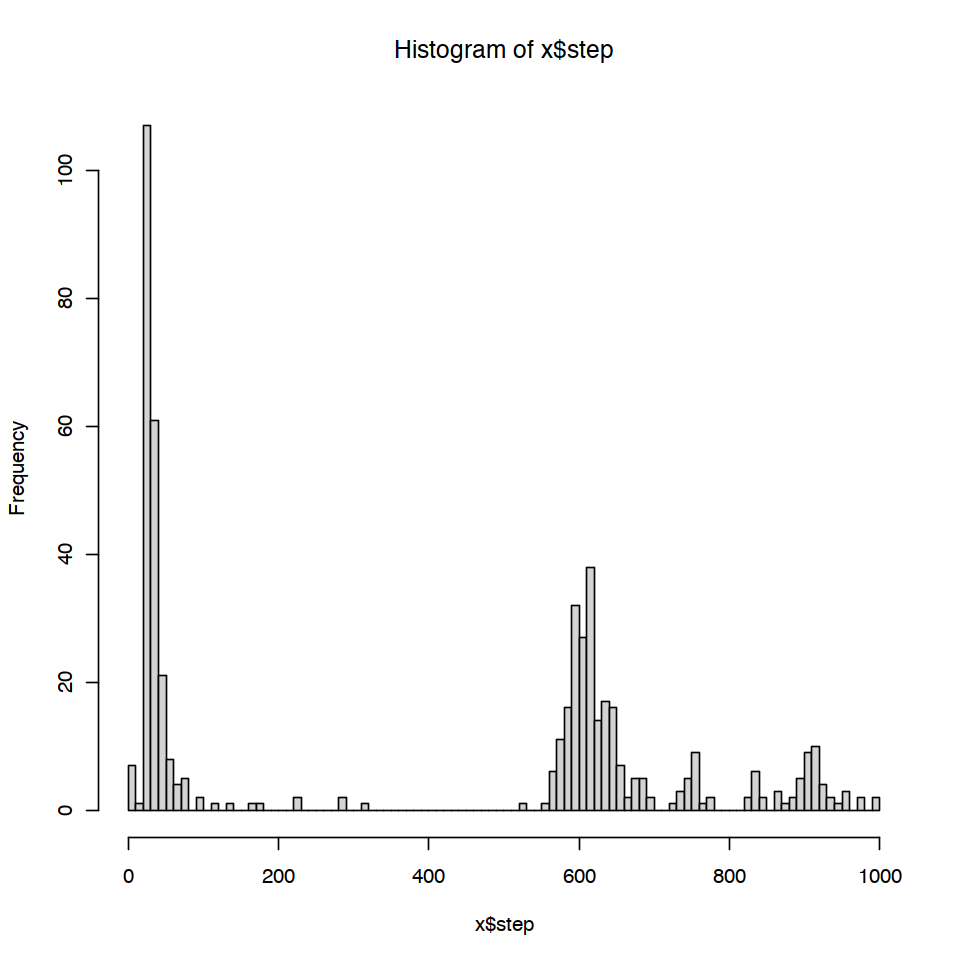

In [7]:
options(repr.plot.width = 8, repr.plot.height = 8)
x <- results %>% mutate(max_step = max(step)) %>% filter(step > 1) %>% group_by(omega_0, run) %>% filter(S_M == max(S_M)) %>% 
     filter(omega_0 == 35) %>% 
     select(omega_0, run, step, S_M) %>% filter(step == min(step))
hist(x$step, breaks = 100)

In [8]:
x %>% filter(run %in% c(0, 5, 8, 16, 134, 280))

omega_0,run,step,S_M
<dbl>,<dbl>,<dbl>,<dbl>
35,0,30,468828.7
35,5,287,464087.2
35,8,614,433912.0
35,16,31,464492.6
35,134,600,456472.1
35,280,897,464354.7


In [9]:
summary <- results %>% mutate(U = (n * H_max - H_M) ** .5 * (S_M - n * S_N) ** .5) %>% mutate(max_step = max(step)) %>% 
    group_by(omega_0, run) %>%  filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1)) %>%
    group_by(omega_0) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = n()) %>% distinct
summary

`summarise()` has grouped output by 'omega_0'. You can override using the
`.groups` argument.


omega_0,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,478681.9,4786.819,21659.85,20704.68,4.279313e+01,2.026248e+00,21.14320,231.06452,90529.27,31
5,469301.9,4693.019,21305.75,20419.98,2.086737e+03,9.910644e+01,21.02651,207.63587,90450.56,368
10,473009.9,4730.099,21446.29,20553.00,1.842016e+03,8.738273e+01,21.04923,178.34400,90497.71,500
20,472413.3,4724.133,21423.14,20535.43,2.614936e+02,1.242469e+01,21.04513,88.33000,90474.86,500
25,472739.1,4727.391,21431.20,20624.43,1.780723e+02,8.535050e+00,20.95971,26.30588,90358.37,170
30,473707.6,4737.076,21471.04,20521.98,1.845323e+20,8.885357e+18,20.80793,68.32394,90449.39,284
35,447956.9,4479.569,20501.18,19609.16,5.416157e+18,2.303121e+17,21.66454,100.15044,90201.13,226
40,475762.2,4757.622,21551.19,20625.11,2.462010e+19,1.175168e+18,20.81917,66.96610,90549.50,472
50,504477.8,5044.778,22618.55,21771.22,4.170173e+19,1.966609e+18,21.45080,185.43636,90310.70,55


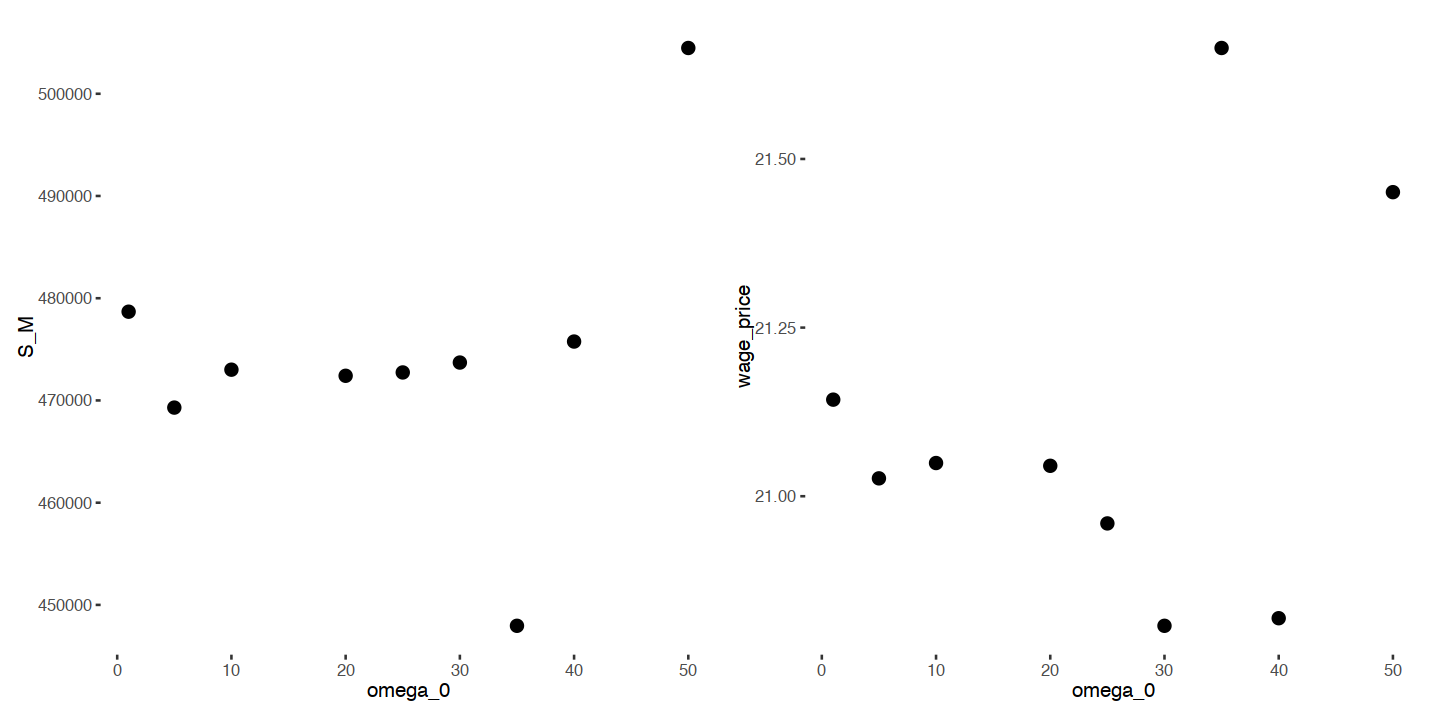

In [10]:
options(repr.plot.width = 12, repr.plot.height = 6)
a <- summary %>% ggplot(aes(x = omega_0, y = S_M)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)

b <- summary %>% ggplot(aes(x = omega_0, y = wage_price)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)
a + b

#### Stickiness

In [27]:
series_name <- 'series_Feb9_t1000_SN300_r500_mu5_n100_w1to50_p1_pctp1_v3_sticky'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Feb10_t1000_SN300_r500_mu5_n100_w55a60_p1_pctp1_v3_sticky'
raw2 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
results <- rbind(raw, raw2) %>% filter(step > 0) %>% select(all_of(macro))
plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max, omega_0)) %>% filter(omega_0 != 1, step > 1)

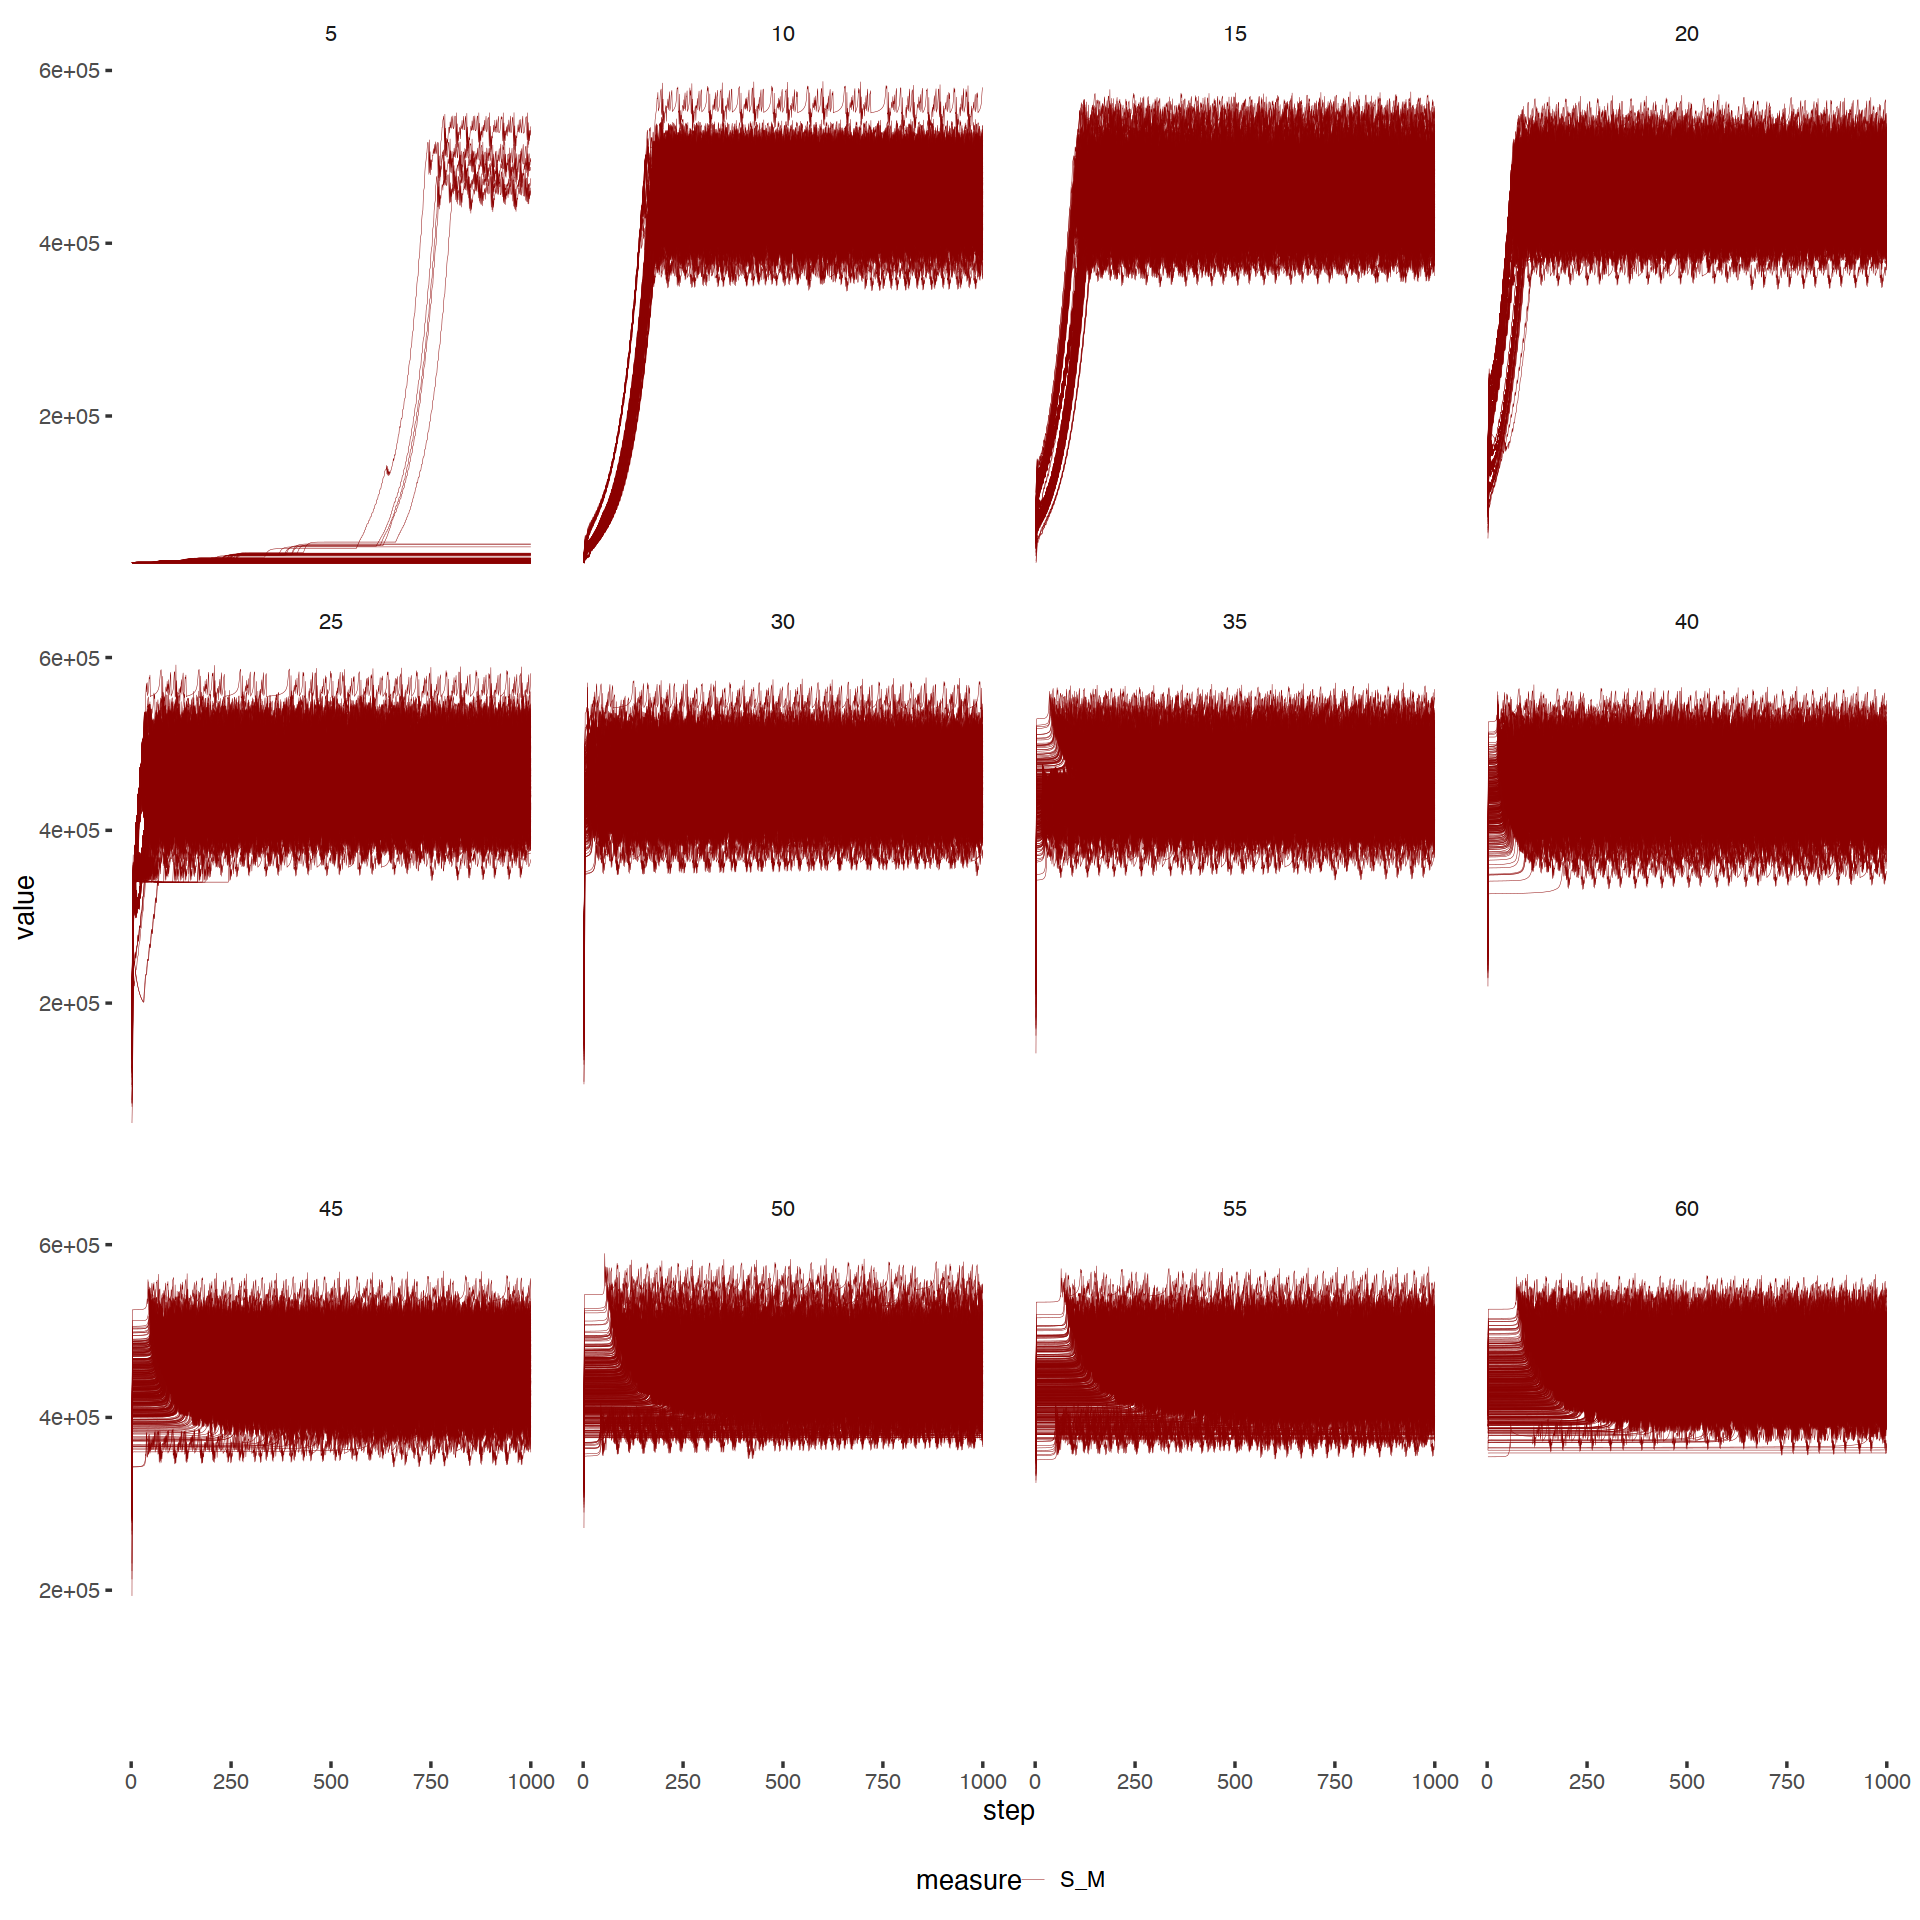

In [28]:
a <- plot_macro %>% filter(measure %in% c('S_M')) %>% 
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ omega_0)

options(repr.plot.width = 16, repr.plot.height = 16)
a

In [33]:
summary <- results %>% mutate(U = (n * H_max - H_M) ** .5 * (S_M - n * S_N) ** .5) %>% filter(step > 1, omega_0 > 5) %>% mutate(max_step = max(step)) %>% 
    group_by(omega_0, run) %>%  filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1)) %>%
    group_by(omega_0) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = n()) %>% distinct
summary

`summarise()` has grouped output by 'omega_0'. You can override using the
`.groups` argument.


omega_0,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
10,479560.8,4795.608,21693.32,20696.69,10,0.4923328,20.32105,372.588,90545.92,500
15,478117.8,4781.178,21638.09,20677.09,15,0.7305504,20.55288,572.898,90510.61,500
20,478230.1,4782.301,21642.72,20685.50,20,0.9714092,20.61057,606.068,90522.98,500
25,479588.1,4795.881,21693.53,20735.59,25,1.2128903,20.63455,572.772,90521.21,500
30,479484.6,4794.846,21690.11,20695.86,30,1.4507739,20.69802,446.098,90534.76,500
35,476526.3,4765.263,21587.37,20611.05,35,1.6870069,20.79163,548.208,90484.26,500
40,478336.3,4783.363,21646.31,20662.94,40,1.9371468,20.66943,473.180,90512.50,500
45,477720.3,4777.203,21623.28,20660.74,45,2.1791060,20.67464,598.668,90513.62,500
50,475056.2,4750.562,21523.01,20582.12,50,2.4199785,20.70119,684.986,90478.24,500


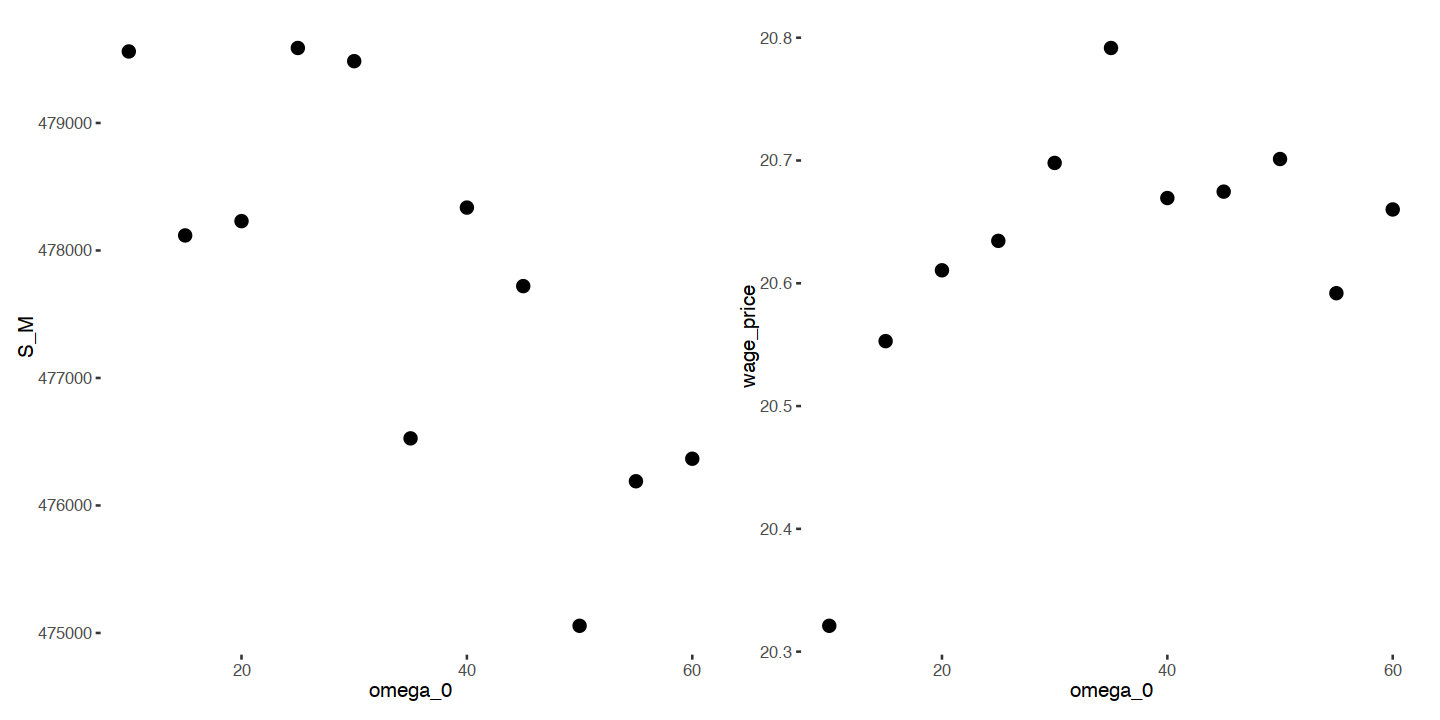

In [34]:
options(repr.plot.width = 12, repr.plot.height = 6)
a <- summary %>% ggplot(aes(x = omega_0, y = S_M)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)

b <- summary %>% ggplot(aes(x = omega_0, y = wage_price)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)
a + b

### pct sensitivity

In [18]:
directory <- './results'
series_name <- 'series_Feb3_t1000_SN300_r500_mu5_n100_w10_p1_pctp01top4_v3'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Feb3_t1000_SN300_r1000_mu5_n100_w10_p1_pctp1_v3' 
raw2 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE) %>% filter(run < 500)

results <- rbind(raw, raw2) %>% filter(step > 0) %>% select(all_of(macro))

plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max, pct))

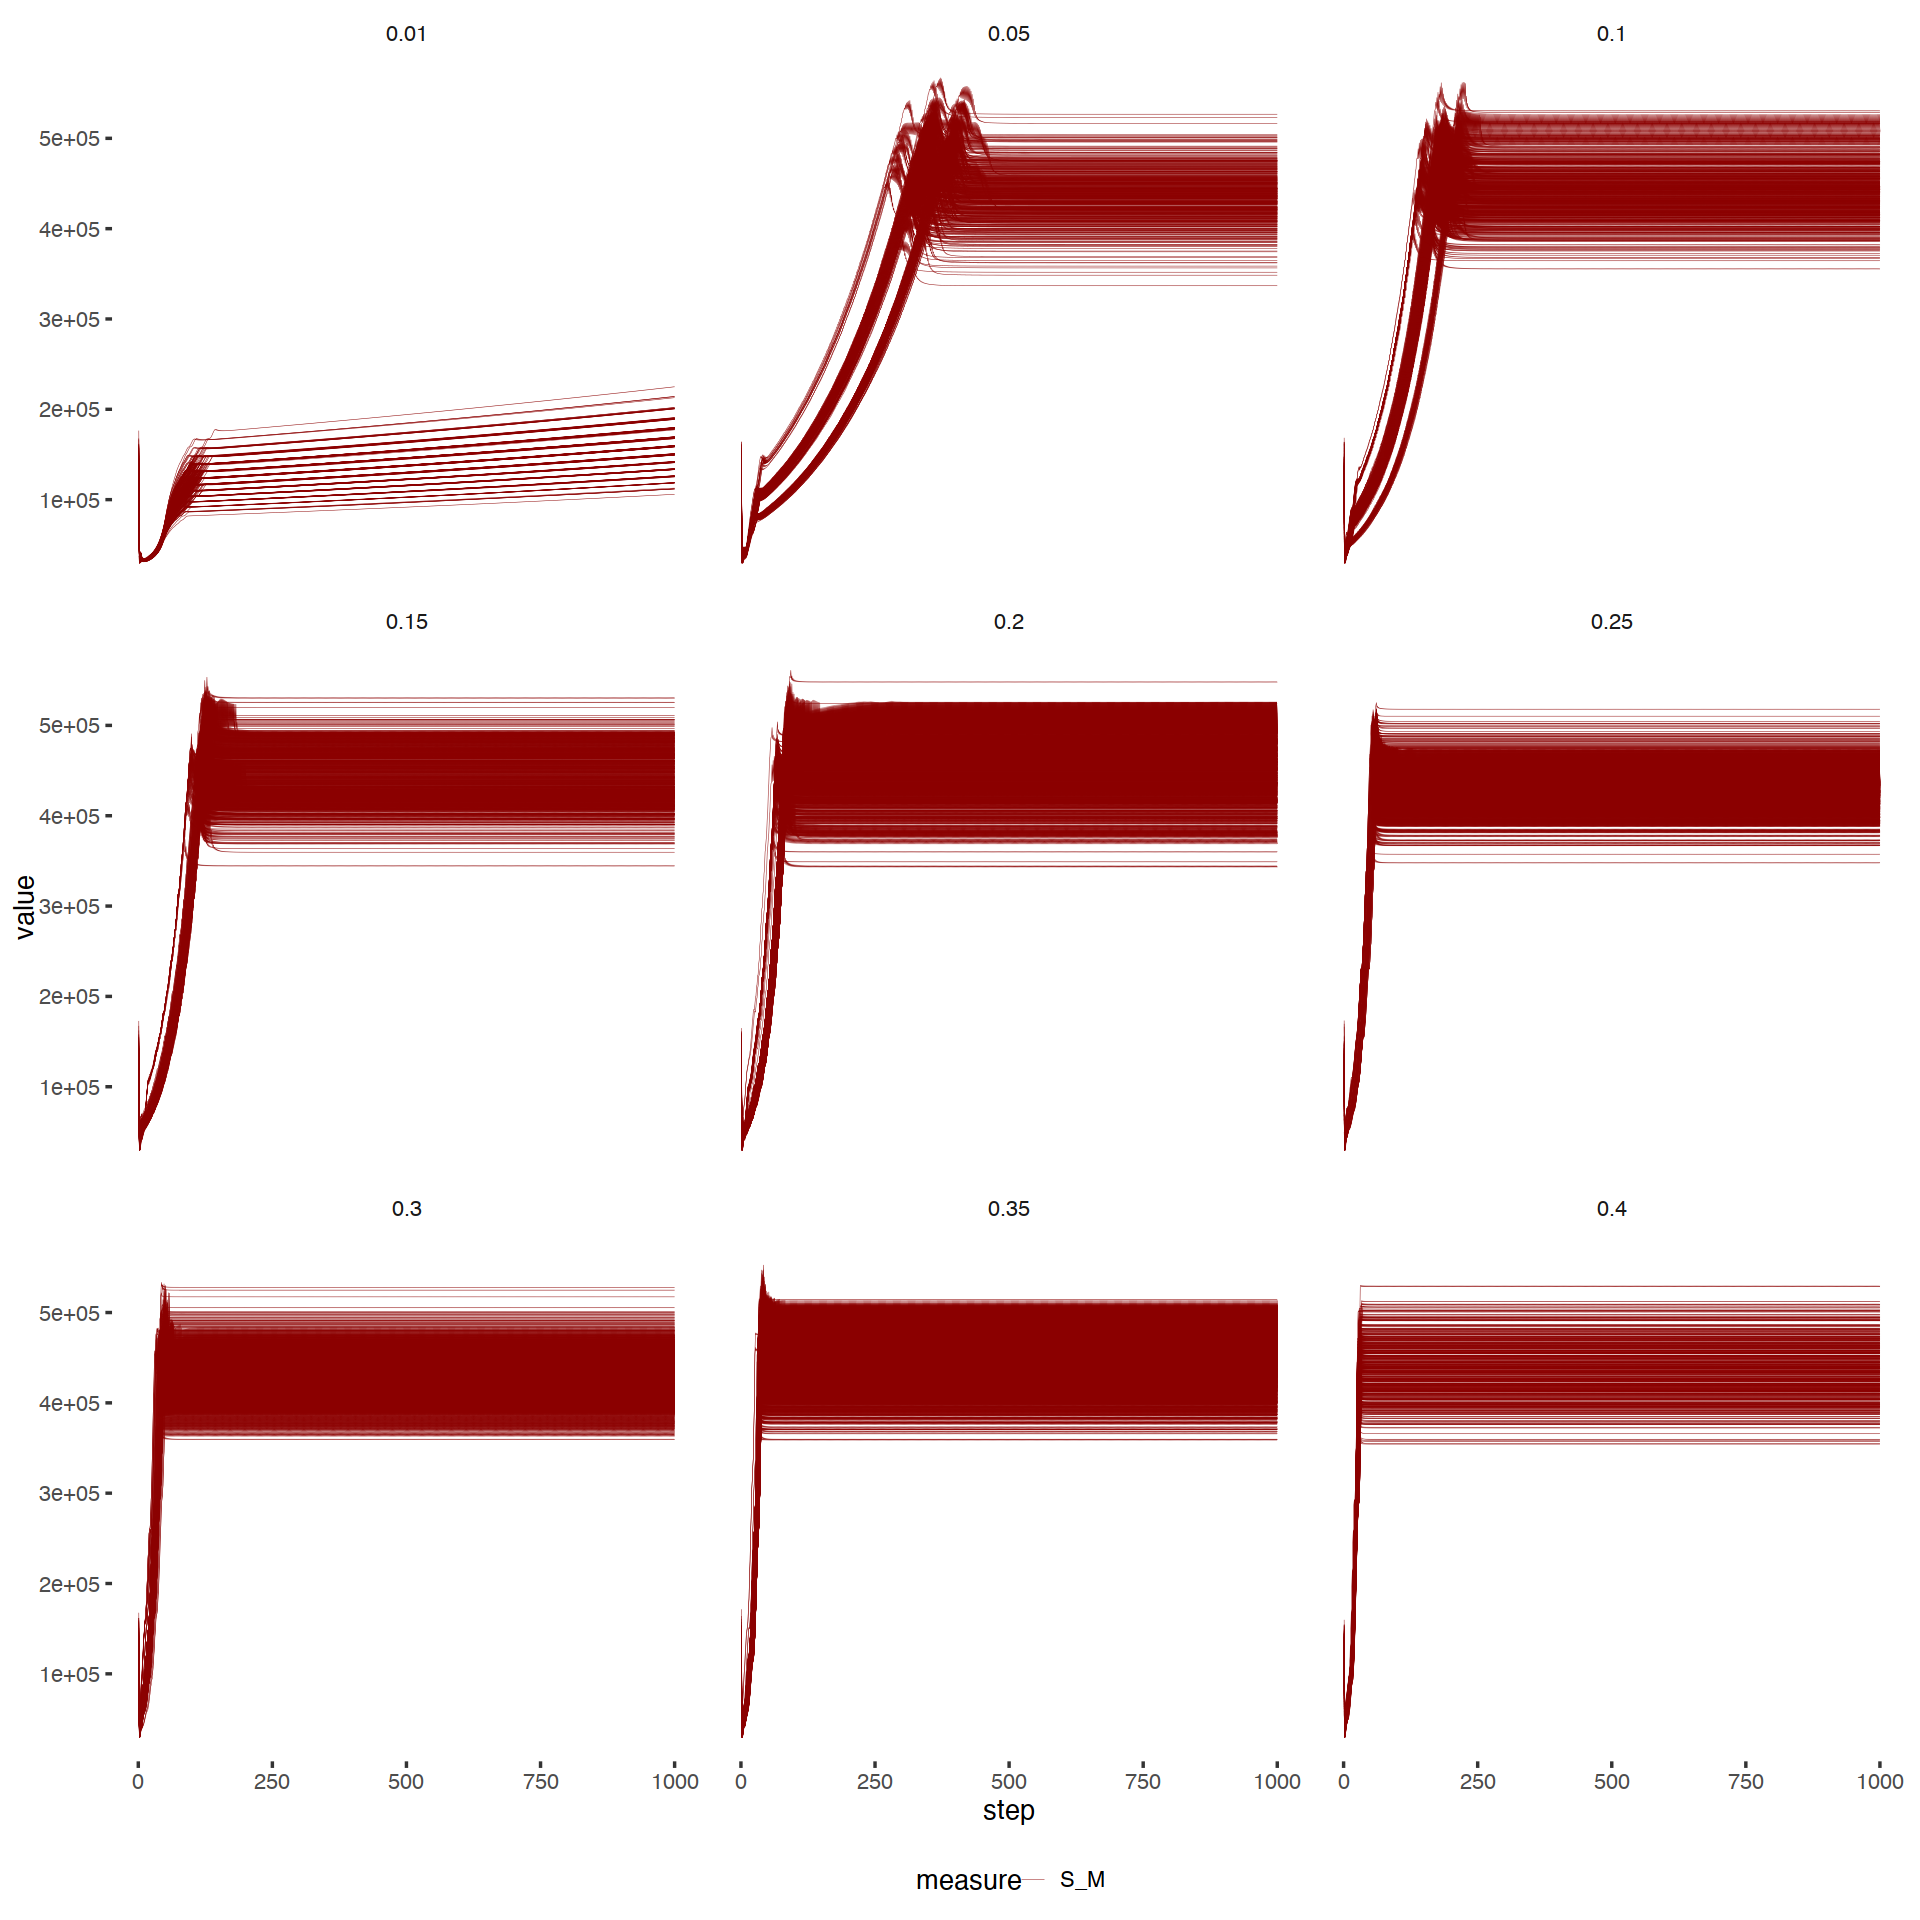

In [19]:
options(repr.plot.width = 16, repr.plot.height = 16)

a <- plot_macro %>% filter(measure %in% c('S_M')) %>% 
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ pct)

a

In [21]:
summary <- results %>% mutate(U = (n * H_max - H_M) ** .5 * (S_M - n * S_N) ** .5) %>% mutate(max_step = max(step)) %>% 
    group_by(pct, run) %>% filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1, max_step)) %>%
    group_by(pct) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = n()) %>% distinct
summary

`summarise()` has grouped output by 'pct'. You can override using the `.groups`
argument.


pct,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.01,160800.7,1608.007,8720.716,20840.63,2.023612e+01,1.106334e+00,18.28533,999.000,63724.04,208
0.05,480792.2,4807.922,21739.960,20634.43,2.229192e+02,1.032839e+01,21.56465,349.296,90560.76,500
0.10,473009.9,4730.099,21446.292,20553.00,1.842016e+03,8.738273e+01,21.04923,178.344,90497.71,500
0.15,468336.4,4683.364,21268.766,20550.19,4.567339e+03,2.215263e+02,20.67614,120.732,90426.55,500
0.20,459833.8,4598.338,20946.545,20435.81,1.942169e+37,9.519887e+35,20.35934,91.788,90317.60,500
0.25,465568.6,4655.686,21159.507,20412.34,4.907758e+46,2.499033e+45,20.10733,157.888,90270.04,500
0.30,467213.4,4672.134,21228.090,20566.09,3.425155e+54,1.806768e+53,20.33205,110.280,90467.81,500
0.35,449510.5,4495.105,20547.993,20182.05,1.284804e+31,6.684557e+29,19.25339,205.444,89980.15,500
0.40,436884.2,4368.842,20070.238,20011.90,3.701436e+02,1.842839e+01,20.08551,30.540,89842.81,500


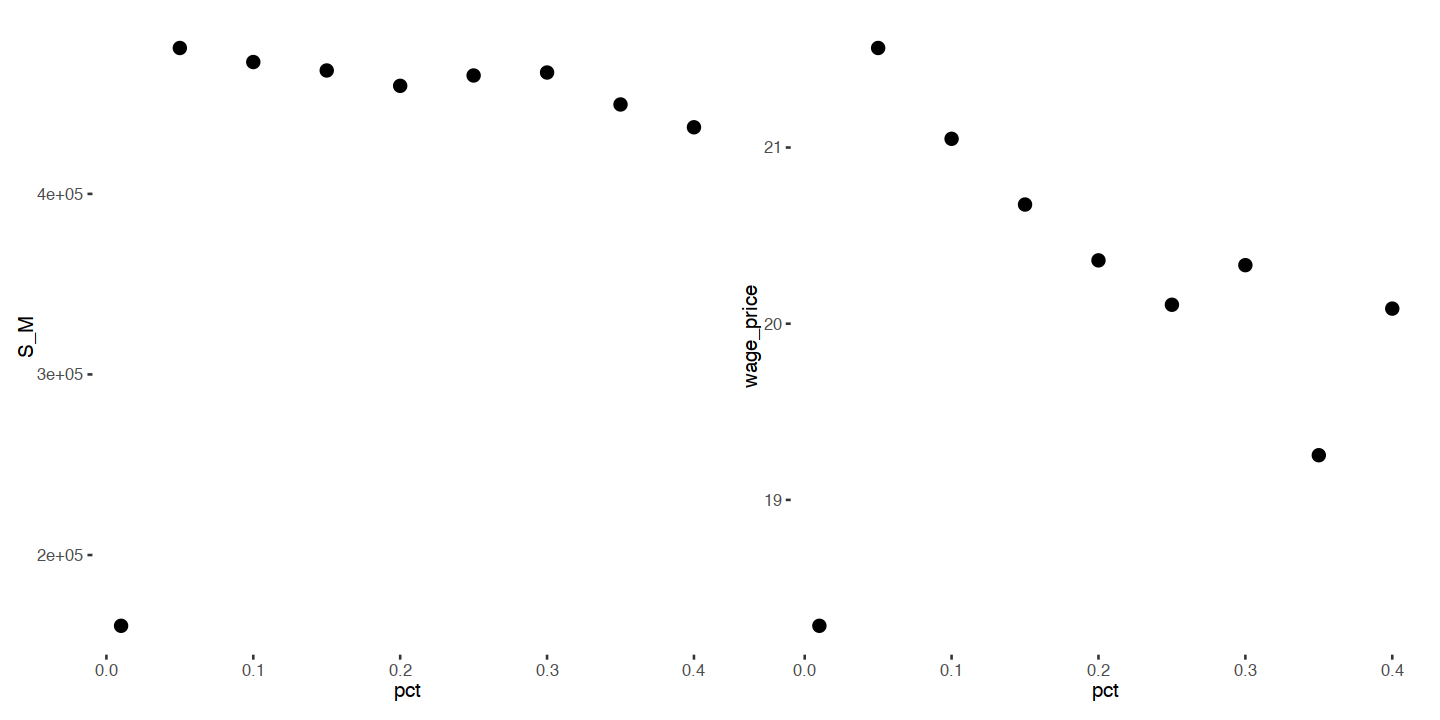

In [22]:
options(repr.plot.width = 12, repr.plot.height = 6)
a <- summary %>% ggplot(aes(x = pct, y = S_M)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)

b <- summary %>% ggplot(aes(x = pct, y = wage_price)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)
a + b

### $\mu$ sensitivity

In [23]:
directory <- './results'
series_name <- 'series_Feb3_t1000_SN300_r500_mu1to20_n100_w10_p1_pctp1_v3'
raw <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE)
series_name <- 'series_Feb3_t1000_SN300_r1000_mu5_n100_w10_p1_pctp1_v3' 
raw2 <- read_csv(paste0(directory, '/', series_name, '.csv'), show_col_types = FALSE) %>% filter(run < 500)

results <- rbind(raw, raw2) %>% filter(step > 0) %>% select(all_of(macro))

plot_macro <- results %>% gather(measure, value, -c(run, step, n, S_N, H_max, mu))

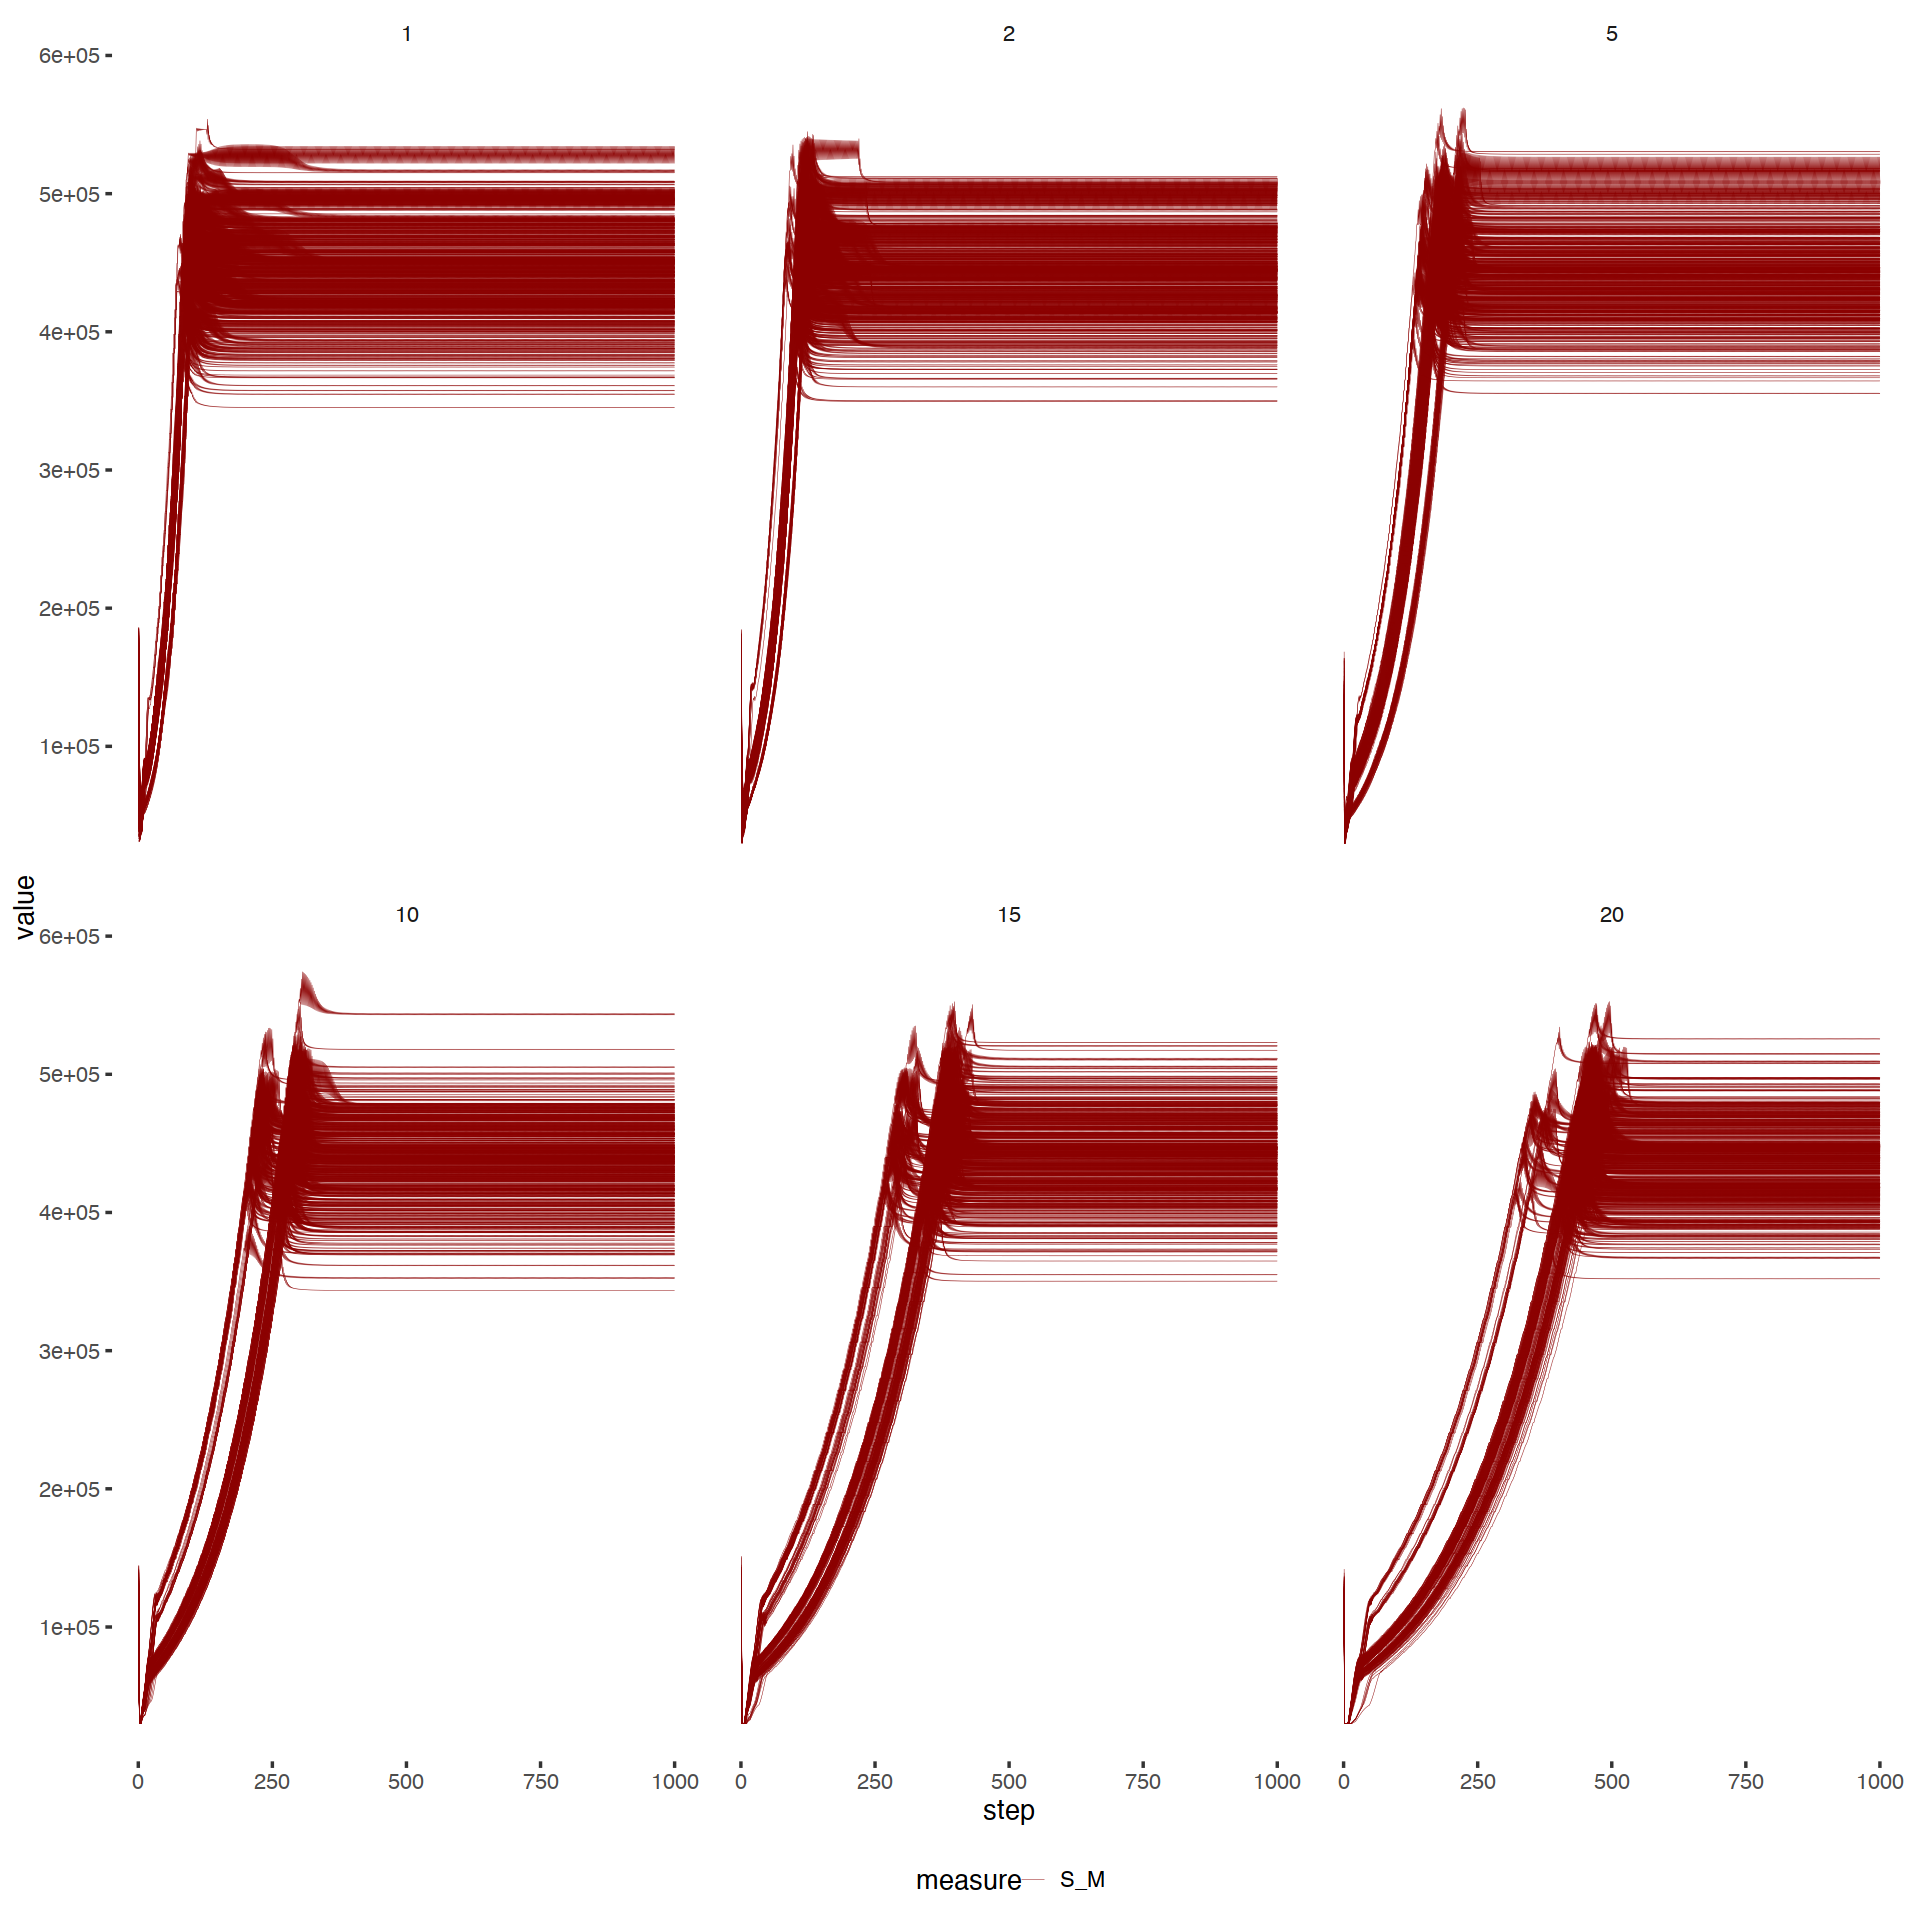

In [24]:
options(repr.plot.width = 16, repr.plot.height = 16)

a <- plot_macro %>% filter(measure %in% c('S_M')) %>% 
    ggplot(aes(x = step, y = value, colour = measure, group = run)) + theme_tufte(base_size = 16) + 
    geom_line(size = .1) + scale_colour_manual(values = palette_ordered[1]) + theme(legend.position = 'bottom') +
    facet_wrap(~ mu)

a

In [25]:
summary <- results %>% mutate(U = (n * H_max - H_M) ** .5 * (S_M - n * S_N) ** .5) %>% mutate(max_step = max(step)) %>% 
    group_by(mu, run) %>% filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1, max_step)) %>%
    group_by(mu) %>% summarise(S_M = mean(S_M), per_capita = S_M / n, H_M = mean(H_M), H_O = mean(total_H_O), wage = mean(omega), price = mean(p), 
                              wage_price = mean(omega / p), step = mean(step), U = mean(U), converged = n()) %>% distinct
summary

`summarise()` has grouped output by 'mu'. You can override using the `.groups`
argument.


mu,S_M,per_capita,H_M,H_O,wage,price,wage_price,step,U,converged
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,463994.9,4639.949,21104.48,20463.63,3.132084e+17,1.473951e+16,21.04060,109.3146,90378.85,499
2,473078.1,4730.781,21448.46,20557.03,3.907265e+17,1.839943e+16,21.07191,119.3454,90486.74,498
5,473009.9,4730.099,21446.29,20553.00,1.842016e+03,8.738273e+01,21.04923,178.3440,90497.71,500
10,470742.5,4707.425,21360.46,20490.14,2.448904e+05,1.161008e+04,21.03519,270.8440,90472.42,500
15,472285.2,4722.852,21418.51,20594.33,2.134804e+07,1.009374e+06,21.06109,362.3080,90479.76,500
20,466662.1,4666.621,21206.11,20417.79,7.360350e+08,3.483211e+07,21.01878,436.5300,90427.90,500


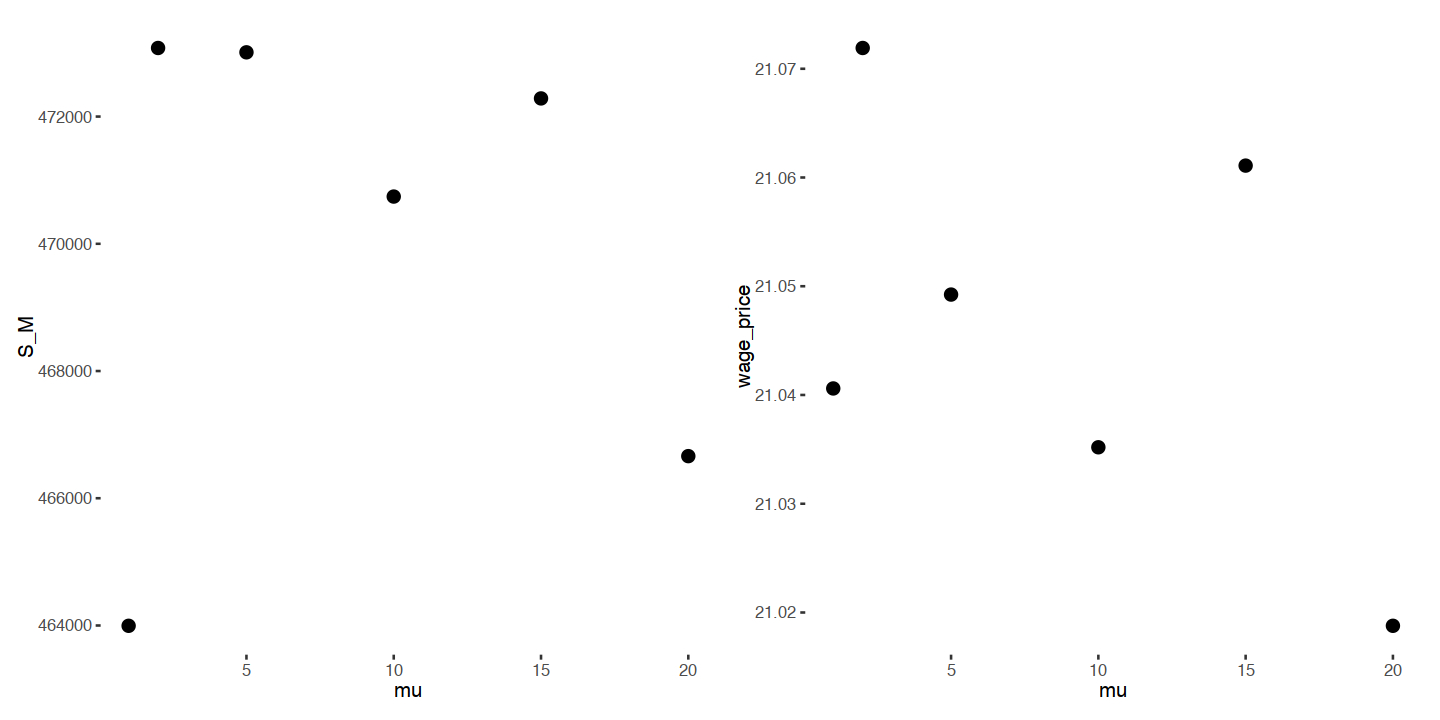

In [27]:
options(repr.plot.width = 12, repr.plot.height = 6)
a <- summary %>% ggplot(aes(x = mu, y = S_M)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)

b <- summary %>% ggplot(aes(x = mu, y = wage_price)) + theme_tufte(base_size = 12) +
    geom_point(size = 3)
a + b

#### One-Way ANOVA

Compute the common variance, which is called variance within samples, $S^2_{within}$, or residual variance.  
Compute the variance between sample means as follow:  
Compute the mean of each group  
Compute the variance between sample means, $S^2_{between}.$  
Produce F-statistic as the ratio of $S^2_{between}$ and $S^2_{within}$.  

A lower ratio (F-statistic < 1) indicates that there are no significant difference between the means of the samples being compared. However, a higher ratio implies that the variation among group means are significant.

If the ANOVA test is significant, we can compute Tukey HSD (Tukey Honest Significant Differences, R function: TukeyHSD()) for performing multiple pairwise-comparison between the means of groups.

The function TukeyHD() takes the fitted ANOVA as an argument.

In [45]:
test_SM <- results %>% mutate(max_step = max(step)) %>% 
    group_by(mu, run) %>% filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1, max_step)) %>% 
ungroup %>% select(mu, S_M) %>% mutate(mu = as.factor(mu))

res.SM <- aov(S_M ~ mu, test_SM)
summary(res.SM )

test_mu <- results %>% mutate(max_step = max(step)) %>% 
    group_by(mu, run) %>% filter(S_M == max(S_M)) %>% filter(step == min(step)) %>% filter(!step %in% c(1, max_step)) %>% 
ungroup %>% select(mu, p, omega) %>% mutate(mu = as.factor(mu), omega_p = omega / p)

res.ratio <- aov(omega_p ~ mu, test_mu)
summary(res.ratio)

              Df    Sum Sq   Mean Sq F value  Pr(>F)    
mu             5 3.570e+10 7.139e+09   8.794 2.7e-08 ***
Residuals   2991 2.428e+12 8.118e+08                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              Df Sum Sq Mean Sq F value  Pr(>F)   
mu             5    0.9 0.17940   3.754 0.00217 **
Residuals   2991  142.9 0.04779                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Differences in mu results for $S_M$ are **not** significant, but are significant for wage-price ratio.

In [46]:
TukeyHSD(res.ratio)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = omega_p ~ mu, data = test_mu)

$mu
             diff          lwr          upr     p adj
2-1    0.03130935 -0.008175078  0.070793772 0.2105052
5-1    0.00863384 -0.030811041  0.048078721 0.9892761
10-1  -0.00540941 -0.044854291  0.034035471 0.9988219
15-1   0.02049300 -0.018951880  0.059937882 0.6762256
20-1  -0.02182554 -0.061270424  0.017619338 0.6133420
5-2   -0.02267551 -0.062140205  0.016789190 0.5729628
10-2  -0.03671876 -0.076183455  0.002745941 0.0852407
15-2  -0.01081635 -0.050281044  0.028648351 0.9706880
20-2  -0.05313489 -0.092599588 -0.013670192 0.0017523
10-5  -0.01404325 -0.053468384  0.025381884 0.9128500
15-5   0.01185916 -0.027565973  0.051284295 0.9563165
20-5  -0.03045938 -0.069884517  0.008965751 0.2364876
15-10  0.02590241 -0.013522723  0.065327545 0.4187946
20-10 -0.01641613 -0.055841267  0.023009001 0.8430834
20-15 -0.04231854 -0.081743678 -0.002893410 0.0270203
